This script aims to extract model sources in a clear and informative format.  The script first shows what all the kinetic and thermo sources are in a model. Then it goes through each reaction and species to show their source and what the assigned uncertainties are.  This can be used with any RMG-generated CHEMKIN file that is annotated.

In [1]:
from rmgpy.tools.uncertainty import Uncertainty
from IPython.display import display
import copy

In [2]:
chemFile = '/home/mjliu/Documents/DTBS/new_runs/pyro/chem_annotated.inp'
dictFile = '/home/mjliu/Documents/DTBS/new_runs/pyro/species_dictionary.txt'

In [3]:
uncertainty = Uncertainty(outputDirectory='testUncertainty')

In [4]:
uncertainty.loadModel(chemFile, dictFile)

In [5]:
uncertainty.loadDatabase()

Averaging thermo data over 4 value(s).
Averaging thermo data over 14 value(s).
Averaging thermo data over 5 value(s).
Averaging thermo data over 5 value(s).
Averaging thermo data over 2 value(s).
Averaging thermo data over 8 value(s).


In [6]:
uncertainty.extractSourcesFromModel()

In [7]:
print 'All Kinetic Sources'
for sourceType in uncertainty.allKineticSources.keys():
    if sourceType == 'Library':
        print '============'
        print 'Library kinetics'
        print ''
        print '\tReactions: ', uncertainty.allKineticSources['Library']
    elif sourceType == 'PDep':
        print '============'
        print 'PDep kinetics'
        print ''
        print '\tReactions: ', uncertainty.allKineticSources['PDep']
    elif sourceType == 'Rate Rules':
        print '============'
        print 'Rate rule kinetics'
        print ''
        for familyLabel, entries in uncertainty.allKineticSources['Rate Rules'].iteritems():
            print '\t', familyLabel
            for entry in entries:
                print '\t\t', entry
    elif sourceType == 'Training':
        print '============'
        print 'Training reaction kinetics'
        print ''
        for familyLabel, entries in uncertainty.allKineticSources['Training'].iteritems():
            print '\t', familyLabel
            for entry in entries:
                print '\t\t', entry
    else:
        print sourceType
        raise Exception('Kinetics source mut be Library, PDep, Rate Rules, or Training')

All Kinetic Sources
Rate rule kinetics

	SubstitutionS
		S-Cs(HHH)Cs(CdHH);HJ
		S-Cs(HHH)Cs(CdCsH);HJ
		S-Cs(HHH)Cs(CdCsCs);HJ
		S-Cs(HHH)Cs(CtHH);HJ
		S-Cs(HHH)Cs(CtCsH);HJ
		S-Cs(HHH)Cs(CtCsCs);HJ
Training reaction kinetics

Library kinetics

	Reactions:  []
PDep kinetics

	Reactions:  []


In [8]:
print 'All Thermo Sources'
for sourceType in uncertainty.allThermoSources.keys():
    if sourceType == 'Library':
        print '============'
        print 'Library thermo'
        print ''
        print '\tSpecies: ', uncertainty.allThermoSources['Library']
    elif sourceType == 'QM':
        print '============'
        print 'QM thermo'
        print ''
        print '\tSpecies: ', uncertainty.allThermoSources['QM']
    elif sourceType == 'GAV':
        print '============'
        print 'Group additivity thermo'
        print ''
        for groupType, entries in uncertainty.allThermoSources['GAV'].iteritems():
            print '\t', groupType
            for entry in entries:
                print '\t\t', entry
    else:
        raise Exception('Thermo source must be GAV, QM, or Library')

All Thermo Sources
Group additivity thermo

	int15
		Ss(Cs(CsCsCs)Cs(CsCsCs))
	gauche
		Ss(RR)
		Ss(CsH)
		Cs(CsRRR)
		Ss(CsCs)
		Ss(CsR)
		CsOsCdSs
		Cs(Cs(CsCsR)RRR)
		Ss(Cs(CsHH)H)
		Cs(RRRR)
		Cs(CsCsCsR)
		Cs(CsCsCsCs)
		Cd(CsCs)
		Cs(Cs(CsCsCs)RRR)
	group
		Cs-CsCsCsSs
		Cs-(Cds-Cds)(Cds-Cds)HH
		Ss-C=SCd
		Cs-CsCsSsH
		Cds-CdsCsCs
		Cs-CsCsCsH
		Ss-SsCd
		Ss-SsCs
		Cds-CdsCsH
		Cs-CsCsHH
		Cs-C=SCsCsCs
		Cs-(Cds-Cds)CsCsH
		C=S-CsSs
		Cs-(Cds-Cds)CsHH
		Cds-CdsSsH
		Cds-CdsHH
		Cs-CsCsCsCs
		Cs-CdsCsSsH
		Ss-CsH
		Cs-C=SCsCsH
		Cs-(Cds-Cds)HHH
		Ss-CdH
		Cs-CsHHH
		Cs-(Cds-Cds)(Cds-Cds)CsCs
		Ss-CdCd
		Cs-C=SCsHH
		Sd-Cd
		C=S-CsCs
		Cds-CdsC=SCs
		Ss-SsH
		C=S-CdsCs
		Ss-SsSs
		Ss-C=SH
		Cds-CdsCsSs
		Cs-CsSsHH
		Cs-CdsSsHH
		C=S-CdsH
		Cdd-CdSd
		Cds-Cds(Cds-Cds)Cs
		C=S-CsH
		Cs-(Cds-Cds)(Cds-Cds)CsH
		Cds-CdsC=SH
		Ss-CsCs
		Cs-(Cds-Cds)CsCsCs
		Ss-CsCd
		Cds-Cds(Cds-Cds)H
		Ss-C=SCs
		Cs-CsCsSsSs
		Cs-CsSsSsH
	radical
		SJ-Cd
		SJ-C=S
		cyclopropane
		C=CC=CCJ
		Cs_P
		SJ-S

In [9]:
# Assign all the uncertainties using the Uncertainty() class function
# ThermoParameterUncertainty and KineticParameterUncertainty classes may be customized and passed into this function
# if non-default constants for constructing the uncertainties are desired
uncertainty.assignParameterUncertainties()

In [10]:
T = 623 # temperature in Kelvin for which to evaluate kinetics
P = 1e5  # Pa 

C[C](C)C(22) + C=C(C)CSC(C)(C)C(106) <=> DTBS(1) + [CH2]C(=C)C(39)


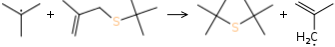

Rate rule estimate
	Family =  SubstitutionS
	Original Template =  ['S-Cs(NonDe)Cs(OneDe)', 'CsJ-CsCsCs']
	Exact =  False
	Rate rule sources:
		S-Cs(HHH)Cs(CdHH);HJ = 0.166666666667
		S-Cs(HHH)Cs(CdCsH);HJ = 0.166666666667
		S-Cs(HHH)Cs(CdCsCs);HJ = 0.166666666667
		S-Cs(HHH)Cs(CtHH);HJ = 0.166666666667
		S-Cs(HHH)Cs(CtCsH);HJ = 0.166666666667
		S-Cs(HHH)Cs(CtCsCs);HJ = 0.166666666667

Rate coefficient at 623 K = 1.00e+06
Uncertainty dln(k) =  3.54876285802


In [11]:
for rxn, source in uncertainty.reactionSourcesDict.iteritems():
    print '======'
    print rxn
    display(rxn)
    if 'Library' in source:
        print 'Library reaction'
    elif 'PDep' in source:
        print 'PDep reaction'
    elif 'Rate Rules' in source:
        print 'Rate rule estimate'
        family = source['Rate Rules'][0]
        sourceDict = source['Rate Rules'][1]
        originalTemplate = sourceDict['template']
        print '\tFamily = ', family
        print '\tOriginal Template = ', [group.label for group in originalTemplate]
        print '\tExact = ', sourceDict['exact']
        rules = sourceDict['rules']
        training = sourceDict['training']
        if rules:
            print '\tRate rule sources:'
            for ruleEntry, weight in rules:
                print '\t\t', ruleEntry, '=', weight
        if training:
            print '\tTraining sources:'
            for ruleEntry, trainingEntry, weight in training:
                print '\t\t', ruleEntry , 'mapped to', trainingEntry , '=', weight
    elif 'Training' in source:
        print 'Training reaction'
        family = source['Training'][0]
        training = source['Training'][1]
        print '\t Family = ', family
        print '\t\t', trainingEntry, '=', weight



    print ''
    print 'Rate coefficient at {} K = {:.2e}'.format(T, rxn.kinetics.getRateCoefficient(T,P))

    # Uncomment the following lines if you want to verify that the parsing has been performed correctly by
    # checking the values for both the original and reconstructed kinetics

#     print '---------'
#     print 'Original kinetics:'
#     print rxn.kinetics
#     print ''
#     print 'Reconstructed kinetics from parsing:'
#     reconstructedKinetics=uncertainty.database.kinetics.reconstructKineticsFromSource(rxn,source,fixBarrierHeight=True)
#     print reconstructedKinetics

    rxnIndex = uncertainty.reactionList.index(rxn)
    print 'Uncertainty dln(k) = ', uncertainty.kineticInputUncertainties[rxnIndex]

C=C1CC[C]1CSS(1889)


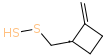

Group additivity:
	radical
		Allyl_T = 1
	ring
		methylenecyclobutane = 1
	other
		R = 8
	group
		Cs-(Cds-Cds)CsCsH = 1
		Cs-(Cds-Cds)CsHH = 1
		Cds-CdsHH = 1
		Ss-SsH = 1
		Ss-SsCs = 1
		Cds-CdsCsCs = 1
		Cs-CsCsHH = 1

Uncertainty dG =  2.61007662723  kcal/mol
CC1C[C](S)C2CC=1S2(4121)


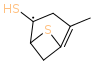

Group additivity:
	radical
		CsJ-CsCsSs = 1
	other
		R = 9
	group
		Cs-(Cds-Cds)CsHH = 1
		Cs-CsCsSsH = 2
		Ss-CsCd = 1
		Cds-CdsCsSs = 1
		Cds-CdsCsCs = 1
		Cs-(Cds-Cds)HHH = 1
		Ss-CsH = 1
	polycyclic
		PolycyclicRing = 1

Uncertainty dG =  2.8394541729  kcal/mol
[CH2]C1(C)CS1(649)


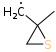

Group additivity:
	radical
		Cs_P = 1
	ring
		thiirane = 1
	other
		R = 5
	group
		Cs-CsCsCsSs = 1
		Ss-CsCs = 1
		Cs-CsSsHH = 1
		Cs-CsHHH = 2

Uncertainty dG =  2.09165006634  kcal/mol
[CH2]C1CC(=S)CCC=1S(3712)


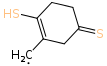

Group additivity:
	radical
		Allyl_P = 1
	ring
		Cyclohexane = 1
	other
		R = 9
	group
		Cs-C=SCsHH = 1
		Cs-(Cds-Cds)CsHH = 1
		Cds-CdsCsSs = 1
		C=S-CsCs = 1
		Cds-CdsCsCs = 1
		Cs-CsCsHH = 1
		Ss-CdH = 1

Uncertainty dG =  2.80624304008  kcal/mol
C=C(C)[C](SC(C)(C)C)SC(C)(C)C(484)


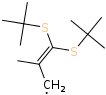

Group additivity:
	radical
		Allyl_P = 1
	gauche
		Ss(CsR) = 2
		Cs(RRRR) = 4
		CsOsCdSs = 1
		Cd(CsCs) = 1
		Cs(CsRRR) = 6
	group
		Cs-CsCsCsSs = 2
		Cds-CdsCsCs = 2
		Ss-CsCd = 2
		Cs-CsHHH = 4
		Cs-(Cds-Cds)HHH = 1
	other
		R = 14

Uncertainty dG =  4.472135955  kcal/mol
C=C1C=C(CC)SC1=S(4867)


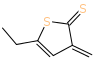

Group additivity:
	ring
		2,3-dihydrothiophene = 1
	other
		R = 9
	group
		Sd-Cd = 1
		C=S-CsSs = 1
		Cds-Cds(Cds-Cds)H = 1
		Cds-CdsHH = 1
		Ss-C=SCd = 1
		Cs-(Cds-Cds)CsHH = 1
		Cds-CdsCsSs = 1
		Cs-CsHHH = 1

Uncertainty dG =  2.80624304008  kcal/mol
C=C1S[C]2SC1CC2C(3340)


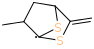

Group additivity:
	radical
		CsJ-CsSsSs = 1
	other
		R = 9
	group
		Ss-CsCs = 1
		Cs-CsCsHH = 1
		Cds-CdsHH = 1
		Cs-CsSsSsH = 1
		Cs-CdsCsSsH = 1
		Cs-CsCsCsH = 1
		Cds-CdsCsSs = 1
		Cs-CsHHH = 1
		Ss-CsCd = 1
	polycyclic
		PolycyclicRing = 1

Uncertainty dG =  2.82842712475  kcal/mol
CC1[CH]C(=S)CCC=1S(3710)


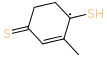

Group additivity:
	radical
		CsJ-CsCdSs = 1
	ring
		Cyclohexane = 1
	other
		R = 9
	group
		Cs-C=SCsHH = 1
		C=S-CdsCs = 1
		Cs-CsCsHH = 1
		Cs-CdsCsSsH = 1
		Ss-CsH = 1
		Cds-CdsCsCs = 1
		Cds-CdsC=SH = 1

Uncertainty dG =  2.80624304008  kcal/mol
CC1CC[C]2CSC=1S2(2769)


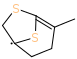

Group additivity:
	radical
		CsJ-CsCsSs = 1
	other
		R = 9
	group
		Cs-(Cds-Cds)CsHH = 1
		Cs-CsCsSsH = 1
		Cs-CsCsHH = 1
		Ss-CsCd = 1
		Cs-(Cds-Cds)HHH = 1
		Cds-CdsCsCs = 2
		Cs-CsSsHH = 1
	polycyclic
		PolycyclicRing = 1

Uncertainty dG =  2.8394541729  kcal/mol
C[C](C)CSSC(C)(C)C(116)


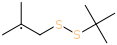

Group additivity:
	radical
		Tertalkyl = 1
	gauche
		Ss(RR) = 2
		Cs(RRRR) = 2
		Cs(Cs(CsCsR)RRR) = 2
		Cs(CsRRR) = 3
		Cs(CsCsCsR) = 1
	group
		Cs-CsCsCsSs = 1
		Cs-CsCsCsH = 1
		Ss-SsCs = 2
		Cs-CsHHH = 4
	other
		R = 10

Uncertainty dG =  3.36340601177  kcal/mol
C=CC1=CC2CSC=2S1(5799)


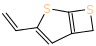

Group additivity:
	other
		R = 9
	group
		Ss-CdCd = 1
		Cs-CdsSsHH = 1
		Cds-Cds(Cds-Cds)H = 2
		Cds-CdsHH = 1
		Ss-CsCd = 1
		Cds-Cds(Cds-Cds)Cs = 1
		Cds-CdsCsCs = 1
	polycyclic
		PolycyclicRing = 1

Uncertainty dG =  2.82842712475  kcal/mol
C[C](C)CSC(C)(C)C(51)


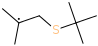

Group additivity:
	radical
		Tertalkyl = 1
	gauche
		Ss(CsCs) = 1
		Cs(RRRR) = 2
		Cs(Cs(CsCsR)RRR) = 2
		Cs(CsRRR) = 3
		Cs(CsCsCsR) = 1
	group
		Cs-CsCsCsSs = 1
		Ss-CsCs = 1
		Cs-CsCsCsH = 1
		Cs-CsHHH = 4
	other
		R = 9

Uncertainty dG =  3.1224989992  kcal/mol
CCC1=CC(C)=C(SC[C](C)C)S1(4887)


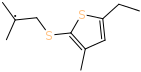

Group additivity:
	radical
		Tertalkyl = 1
	ring
		thiophene = 1
	other
		R = 13
	group
		Ss-CdCd = 1
		Cs-(Cds-Cds)CsHH = 1
		Cs-CsSsHH = 1
		Cds-Cds(Cds-Cds)H = 1
		Cds-CdsCsCs = 1
		Cs-CsCsCsH = 1
		Cds-Cds(Cds-Cds)Cs = 1
		Cds-CdsCsSs = 1
		Cs-(Cds-Cds)HHH = 1
		Cs-CsHHH = 3
		Ss-CsCd = 1

Uncertainty dG =  3.75832409459  kcal/mol
S8J(8)


Group additivity:
	radical
		SJ-Ss-Ss = 2
	gauche
		Ss(RR) = 8
	group
		Ss-SsSs = 6
		Ss-SsH = 2
	other
		R = 8

Uncertainty dG =  3.60555127546  kcal/mol
S=C=S(1050)


Thermo Library:  77

Uncertainty dG =  2.0  kcal/mol
C=C(C)[C](SS)C(C)(C)C(1432)


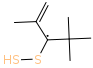

Group additivity:
	gauche
		Ss(RR) = 2
		Cs(Cs(CsCsCs)RRR) = 3
		CsOsCdSs = 1
		Cs(CsCsCsCs) = 1
		Cs(RRRR) = 2
		Cd(CsCs) = 1
	group
		Cs-(Cds-Cds)HHH = 1
		Ss-SsH = 1
		Cs-CsHHH = 2
		Cs-CdsCsSsH = 1
		Cds-CdsCsCs = 1
		Ss-SsCs = 1
		Cs-CsCsCsCs = 1
	other
		R = 10

Uncertainty dG =  3.22102468168  kcal/mol
CC1C[C]2CCC=1SS2(3882)


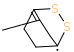

Group additivity:
	radical
		CsJ-CsCsSs = 1
	other
		R = 9
	group
		Cs-(Cds-Cds)CsHH = 1
		Cs-CsCsSsH = 1
		Ss-SsCd = 1
		Cds-CdsCsCs = 1
		Cs-(Cds-Cds)HHH = 1
		Cds-CdsCsSs = 1
		Cs-CsCsHH = 1
		Ss-SsCs = 1
	polycyclic
		PolycyclicRing = 1

Uncertainty dG =  2.8173569174  kcal/mol
CC12CC1(S)[CH]CC2=S(4146)


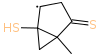

Group additivity:
	radical
		Cs_S = 1
	other
		R = 9
	group
		Sd-Cd = 1
		Cs-C=SCsCsCs = 1
		Cs-CsCsCsSs = 1
		Cs-CsCsHH = 2
		Ss-CsH = 1
		C=S-CsCs = 1
		Cs-CsHHH = 1
		Cs-C=SCsHH = 1
	polycyclic
		PolycyclicRing = 1

Uncertainty dG =  2.85043856275  kcal/mol
C=C(C)SC(C)(C)C(67)


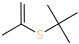

Group additivity:
	gauche
		Ss(CsR) = 1
		Cs(RRRR) = 2
		CsOsCdSs = 2
		Cs(CsRRR) = 3
	group
		Cds-CdsHH = 1
		Cs-CsCsCsSs = 1
		Ss-CsCd = 1
		Cs-CsHHH = 2
		Cs-(Cds-Cds)HHH = 1
	other
		R = 8

Uncertainty dG =  2.80624304008  kcal/mol
C[C]1SC(=S)C2(C)CC12(3202)


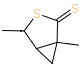

Group additivity:
	radical
		CsJ-CsCsSs = 1
	other
		R = 9
	group
		Sd-Cd = 1
		Cs-C=SCsCsCs = 1
		Cs-CsCsSsH = 1
		Cs-CsCsHH = 1
		Cs-CsCsCsH = 1
		Ss-C=SCs = 1
		Cs-CsHHH = 2
		C=S-CsSs = 1
	polycyclic
		PolycyclicRing = 1

Uncertainty dG =  2.85043856275  kcal/mol
C=C(C)S[S](502)


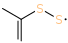

Group additivity:
	radical
		SJ-Ss-Cs = 1
	gauche
		Cs(RRRR) = 1
		CsOsCdSs = 2
		Ss(RR) = 2
	group
		Cs-(Cds-Cds)HHH = 1
		Ss-SsCd = 1
		Ss-SsH = 1
		Cds-CdsCsSs = 1
	other
		R = 5

Uncertainty dG =  2.16506350946  kcal/mol
[CH2]C(=C)SC(=S)C(=C)C(1719)


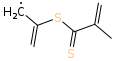

Group additivity:
	radical
		Allyl_P = 1
	gauche
		Cs(RRRR) = 2
		CsOsCdSs = 4
		Ss(RR) = 1
	group
		Sd-Cd = 1
		C=S-CsSs = 1
		Cs-(Cds-Cds)HHH = 2
		Cds-CdsHH = 2
		Ss-C=SCd = 1
		Cds-CdsCsSs = 1
		Cds-CdsC=SCs = 1
	other
		R = 9

Uncertainty dG =  3.08220700148  kcal/mol
CC12CC=C(C1)S[C]2S(3112)


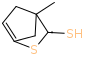

Group additivity:
	radical
		CsJ-CsSsSs = 1
	other
		R = 9
	group
		Cs-(Cds-Cds)CsHH = 2
		Cs-CsHHH = 1
		Ss-CsCd = 1
		Cds-CdsCsSs = 1
		Cds-CdsCsH = 1
		Cs-CsCsCsCs = 1
		Ss-CsH = 1
	polycyclic
		PolycyclicRing = 1

Uncertainty dG =  2.8394541729  kcal/mol
S2JJ(13)


Thermo Library:  16

Uncertainty dG =  2.0  kcal/mol
C=C1CSS1(1572)


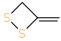

Group additivity:
	ring
		1,2-dithietane = 1
	other
		R = 5
	group
		Cs-CdsSsHH = 1
		Ss-SsCd = 1
		Cds-CdsHH = 1
		Ss-SsCs = 1
		Cds-CdsCsSs = 1

Uncertainty dG =  2.04633819297  kcal/mol
C=C(C)CSC(C)(C)C(106)


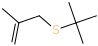

Group additivity:
	gauche
		Ss(CsCs) = 1
		Cs(RRRR) = 3
		CsOsCdSs = 1
		Cd(CsCs) = 1
		Cs(CsRRR) = 3
	group
		Cs-CdsSsHH = 1
		Cs-CsCsCsSs = 1
		Cds-CdsHH = 1
		Ss-CsCs = 1
		Cds-CdsCsCs = 1
		Cs-CsHHH = 2
	other
		R = 9

Uncertainty dG =  3.03108891325  kcal/mol
[CH2]CC1=CC(C)=C(S)S1(4532)


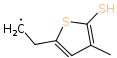

Group additivity:
	radical
		RCCJ = 1
	ring
		thiophene = 1
	other
		R = 9
	group
		Ss-CdCd = 1
		Cds-Cds(Cds-Cds)H = 1
		Cds-CdsCsSs = 1
		Cs-(Cds-Cds)CsHH = 1
		Cds-CdsCsCs = 1
		Cs-(Cds-Cds)HHH = 1
		Cs-CsHHH = 1
		Ss-CdH = 1

Uncertainty dG =  2.8173569174  kcal/mol
C=C(C)C(=S)C(C)(C)C(507)


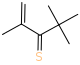

Group additivity:
	gauche
		Cs(RRRR) = 2
		CsOsCdSs = 2
		Cs(CsRRR) = 3
	group
		Sd-Cd = 1
		Cs-C=SCsCsCs = 1
		Cs-(Cds-Cds)HHH = 1
		Cds-CdsHH = 1
		C=S-CdsCs = 1
		Cs-CsHHH = 2
	other
		R = 9

Uncertainty dG =  2.98956518578  kcal/mol
C=[C]C1=CC(C)=C(S)S1(5300)


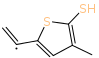

Group additivity:
	radical
		C=CJC=C = 1
	ring
		thiophene = 1
	other
		R = 9
	group
		Ss-CdCd = 1
		Cs-(Cds-Cds)HHH = 1
		Cds-CdsHH = 1
		Cds-Cds(Cds-Cds)Cs = 1
		Cds-Cds(Cds-Cds)H = 1
		Cds-CdsCsCs = 2
		Ss-CdH = 1

Uncertainty dG =  2.8394541729  kcal/mol
CC1CC([S])=CCC=1S(3592)


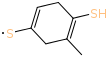

Group additivity:
	radical
		SJ-Cd = 1
	ring
		1,4-Cyclohexadiene = 1
	other
		R = 9
	group
		Cs-(Cds-Cds)(Cds-Cds)HH = 2
		Cds-CdsCsSs = 2
		Cds-CdsCsH = 1
		Cds-CdsCsCs = 1
		Cs-(Cds-Cds)HHH = 1
		Ss-CdH = 1

Uncertainty dG =  2.86138078556  kcal/mol
[CH2]C(=C)SS(1409)


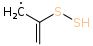

Group additivity:
	radical
		Allyl_P = 1
	gauche
		Cs(RRRR) = 1
		CsOsCdSs = 2
		Ss(RR) = 2
	group
		Cs-(Cds-Cds)HHH = 1
		Ss-SsCd = 1
		Ss-SsH = 1
		Cds-CdsCsSs = 1
	other
		R = 5

Uncertainty dG =  2.16506350946  kcal/mol
C=C1C2[C](CC)SC12S(5101)


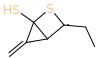

Group additivity:
	radical
		CsJ-CsCsSs = 1
	other
		R = 9
	group
		Cs-(Cds-Cds)CsCsH = 1
		Cds-CdsHH = 1
		Cs-CsCsCsCs = 1
		Ss-CsCs = 1
		Cs-CsCsSsH = 1
		Cds-CdsCsCs = 1
		Cs-CsHHH = 1
	polycyclic
		PolycyclicRing = 1

Uncertainty dG =  2.80624304008  kcal/mol
[CH2]C1(C)SS1(1407)


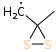

Group additivity:
	radical
		Cs_P = 1
	ring
		dithiirane = 1
	other
		R = 5
	group
		Ss-SsCs = 2
		Cs-CsCsSsSs = 1
		Cs-CsHHH = 2

Uncertainty dG =  2.12132034356  kcal/mol
[CH2]C(=C)C(39)


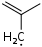

Group additivity:
	radical
		Allyl_P = 1
	gauche
		Cs(RRRR) = 2
		CsOsCdSs = 1
		Cd(CsCs) = 1
	group
		Cs-(Cds-Cds)HHH = 2
		Cds-CdsHH = 1
		Cds-CdsCsCs = 1
	other
		R = 4

Uncertainty dG =  2.01556443707  kcal/mol
C=C(C)C=S(224)


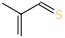

Thermo Library:  49

Uncertainty dG =  2.0  kcal/mol
C=C(C)CS(83)


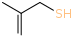

Group additivity:
	gauche
		Ss(CsH) = 1
		Cs(RRRR) = 2
		CsOsCdSs = 1
		Cd(CsCs) = 1
	group
		Cs-CdsSsHH = 1
		Ss-CsH = 1
		Cds-CdsHH = 1
		Cs-(Cds-Cds)HHH = 1
	other
		R = 5

Uncertainty dG =  2.12132034356  kcal/mol
C=CC1=CC(C)=C(S)S1(3562)


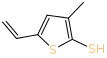

Group additivity:
	ring
		thiophene = 1
	other
		R = 9
	group
		Ss-CdCd = 1
		Cs-(Cds-Cds)HHH = 1
		Cds-CdsHH = 1
		Cds-Cds(Cds-Cds)Cs = 1
		Cds-Cds(Cds-Cds)H = 1
		Cds-CdsCsCs = 2
		Ss-CdH = 1

Uncertainty dG =  2.82842712475  kcal/mol
C=C(C)[C](SSC(C)(C)C)C(C)(C)C(525)


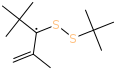

Group additivity:
	radical
		CsJ-CsCdSs = 1
	gauche
		Cs(CsRRR) = 3
		Ss(RR) = 2
		Cs(Cs(CsCsCs)RRR) = 3
		CsOsCdSs = 1
		Cs(CsCsCsCs) = 1
		Cs(RRRR) = 3
		Cd(CsCs) = 1
	group
		Cs-CsCsCsSs = 1
		Cds-CdsHH = 1
		Cs-CsHHH = 6
		Cs-(Cds-Cds)HHH = 1
		Ss-SsCs = 2
		Cs-CsCsCsCs = 1
	other
		R = 14

Uncertainty dG =  4.40879802214  kcal/mol
[CH2]C(=C)C[CH]C1=CC(=C)C(=S)S1(5771)


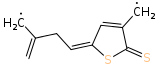

Group additivity:
	radical
		Allyl_P = 1
		C=CC=CCJ = 1
	ring
		2,5-dihydrothiophene = 1
	other
		R = 12
	group
		Sd-Cd = 1
		C=S-CsSs = 1
		Cs-(Cds-Cds)(Cds-Cds)HH = 1
		Cds-CdsHH = 1
		Ss-C=SCd = 1
		Cds-CdsCsH = 1
		Cds-CdsCsCs = 2
		Cs-(Cds-Cds)HHH = 2
		Cds-CdsC=SCs = 1

Uncertainty dG =  3.51781181987  kcal/mol
C=C1C[C]2CCC1(S)S2(4426)


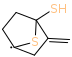

Group additivity:
	radical
		CsJ-CsCsSs = 1
	other
		R = 9
	group
		Cs-(Cds-Cds)CsHH = 1
		Cds-CdsHH = 1
		Cs-CsCsCsCs = 1
		Ss-CsCs = 1
		Cs-CsCsSsH = 1
		Cds-CdsCsCs = 1
		Cs-CsCsHH = 2
	polycyclic
		PolycyclicRing = 1

Uncertainty dG =  2.8394541729  kcal/mol
C=C(C)SS(189)


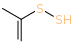

Group additivity:
	gauche
		Cs(RRRR) = 1
		CsOsCdSs = 2
		Ss(RR) = 2
	group
		Cs-(Cds-Cds)HHH = 1
		Ss-SsCd = 1
		Ss-SsH = 1
		Cds-CdsCsSs = 1
	other
		R = 5

Uncertainty dG =  2.15058131676  kcal/mol
C[C](C)CSC1SC(C)=CCC=1C(3220)


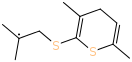

Group additivity:
	radical
		Tertalkyl = 1
	ring
		Cyclohexane = 1
	other
		R = 13
	group
		Ss-CdCd = 1
		Cs-(Cds-Cds)(Cds-Cds)HH = 1
		Cds-CdsCsSs = 1
		Cs-CsSsHH = 1
		Cds-CdsCsH = 1
		Cs-CsCsCsH = 1
		Cs-(Cds-Cds)HHH = 2
		Cds-CdsCsCs = 2
		Cs-CsHHH = 1
		Ss-CsCd = 1

Uncertainty dG =  3.73329613077  kcal/mol
[CH2]C(=C)CS(546)


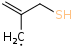

Group additivity:
	radical
		Allyl_P = 1
	gauche
		Ss(CsH) = 1
		Cs(RRRR) = 2
		CsOsCdSs = 1
		Cd(CsCs) = 1
	group
		Cs-CdsSsHH = 1
		Ss-CsH = 1
		Cds-CdsHH = 1
		Cs-(Cds-Cds)HHH = 1
	other
		R = 5

Uncertainty dG =  2.13600093633  kcal/mol
C[C](C)S[S](102)


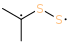

Group additivity:
	radical
		SJ-Ss-Cs = 1
	gauche
		Ss(RR) = 2
		Cs(RRRR) = 1
		Cs(CsRRR) = 2
	group
		Ss-SsCs = 1
		Cs-CsCsSsH = 1
		Ss-SsH = 1
		Cs-CsHHH = 2
	other
		R = 5

Uncertainty dG =  2.20794021658  kcal/mol
C[CH]C12C=C(C)C1(S)S2(5012)


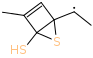

Group additivity:
	radical
		Cs_S = 1
	other
		R = 9
	group
		Cs-(Cds-Cds)HHH = 1
		Cs-CsCsHH = 1
		Cs-CsCsCsCs = 2
		Ss-CsCs = 1
		Cds-CdsCsCs = 1
		Cds-CdsCsH = 1
		Cs-CsHHH = 1
	polycyclic
		PolycyclicRing = 1

Uncertainty dG =  2.8394541729  kcal/mol
C4H8JSH(14)


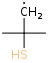

Thermo Library:  7
Group additivity:
	radical
		Cs_P = 1

Uncertainty dG =  2.51246890528  kcal/mol
CC1(C)SS1(1616)


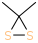

Group additivity:
	ring
		dithiirane = 1
	other
		R = 5
	group
		Ss-SsCs = 2
		Cs-CsCsSsSs = 1
		Cs-CsHHH = 2

Uncertainty dG =  2.10653744329  kcal/mol
HSJ(16)


Thermo Library:  19

Uncertainty dG =  2.0  kcal/mol
CC1CC(=S)[CH]CC1=S(3904)


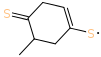

Group additivity:
	radical
		SJ-Cd = 1
	ring
		Cyclohexane = 1
	other
		R = 9
	group
		Sd-Cd = 1
		Cs-(Cds-Cds)CsHH = 1
		Cs-CsCsHH = 1
		Cs-C=SCsCsH = 1
		Cds-CdsCsH = 1
		C=S-CsCs = 1
		Cds-CdsCsSs = 1
		Cs-CsHHH = 1
		Ss-CdH = 1

Uncertainty dG =  2.82842712475  kcal/mol
[CH2]C1C=C(C=C)SC=1[S](5314)


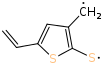

Group additivity:
	radical
		SJ-Cd = 1
		Allyl_P = 1
	ring
		thiophene = 1
	other
		R = 9
	group
		Ss-CdCd = 1
		Cs-(Cds-Cds)HHH = 1
		Cds-CdsHH = 1
		Cds-Cds(Cds-Cds)Cs = 1
		Cds-Cds(Cds-Cds)H = 1
		Cds-CdsCsCs = 2
		Ss-CdH = 1

Uncertainty dG =  2.85043856275  kcal/mol
C[C](C)CSC1CC=C(S)CC=1C(4157)


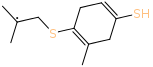

Group additivity:
	radical
		Tertalkyl = 1
	ring
		1,4-Cyclohexadiene = 1
	other
		R = 13
	group
		Cs-(Cds-Cds)(Cds-Cds)HH = 1
		Cds-CdsCsSs = 2
		Cs-CsSsHH = 1
		Cds-CdsCsH = 1
		Cs-CsCsCsH = 1
		Cs-(Cds-Cds)HHH = 1
		Cds-CdsCsCs = 1
		Ss-CdH = 1
		Cs-CsHHH = 2
		Ss-CsCd = 1

Uncertainty dG =  3.73329613077  kcal/mol
HSSH(17)


Thermo Library:  20

Uncertainty dG =  2.0  kcal/mol
[CH2]C(C)(C)SC1SC(=CC=1C)CC(4886)


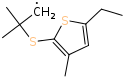

Group additivity:
	radical
		Cs_P = 1
	ring
		thiophene = 1
	other
		R = 13
	group
		Ss-CdCd = 1
		Cs-CsCsCsSs = 1
		Cds-Cds(Cds-Cds)H = 1
		Cds-CdsCsCs = 1
		Cds-Cds(Cds-Cds)Cs = 1
		Cs-(Cds-Cds)CsHH = 1
		Cs-(Cds-Cds)HHH = 1
		Cds-CdsCsSs = 1
		Cs-CsHHH = 4
		Ss-CsCd = 1

Uncertainty dG =  3.80788655293  kcal/mol
CC1C[CH]C2(C)SC=1S2(3177)


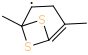

Group additivity:
	radical
		Cs_S = 1
	other
		R = 9
	group
		Cs-(Cds-Cds)CsHH = 1
		Cs-CsCsHH = 1
		Cs-CsCsSsSs = 1
		Ss-CsCd = 1
		Cs-(Cds-Cds)HHH = 1
		Cds-CdsCsCs = 2
		Cs-CsHHH = 1
	polycyclic
		PolycyclicRing = 1

Uncertainty dG =  2.8394541729  kcal/mol
Ar


Thermo Library:  0

Uncertainty dG =  2.0  kcal/mol
C=C(C)[C]=S(280)


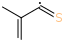

Thermo Library:  49
Group additivity:
	radical
		C=SJ-Cd = 1

Uncertainty dG =  2.51246890528  kcal/mol
[CH2]C(=C)C[C](C)C(=S)C(C)(C)C(1749)


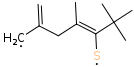

Group additivity:
	radical
		Allyl_P = 1
		SJ-Cd = 1
	gauche
		Ss(RR) = 1
		CsOsCdSs = 2
		Cs(Cs(CsCsR)RRR) = 3
		Cs(RRRR) = 3
		Cd(CsCs) = 2
		Cs(CsCsCsR) = 1
	group
		Cs-(Cds-Cds)CsCsCs = 1
		Cds-CdsHH = 1
		Cs-(Cds-Cds)(Cds-Cds)HH = 1
		Cds-CdsCsCs = 2
		Cs-(Cds-Cds)HHH = 2
		Cds-CdsCsSs = 1
		Cs-CsHHH = 3
		Ss-CdH = 1
	other
		R = 12

Uncertainty dG =  3.80788655293  kcal/mol
CC1(C)CSS1(190)


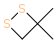

Group additivity:
	ring
		1,2-dithietane = 1
	other
		R = 6
	group
		Cs-CsCsCsSs = 1
		Cs-CsSsHH = 1
		Ss-SsCs = 2
		Cs-CsHHH = 2

Uncertainty dG =  2.27760839479  kcal/mol
CCC1=CC(C)=C([S])S1(4756)


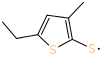

Group additivity:
	radical
		SJ-Cd = 1
	ring
		thiophene = 1
	other
		R = 9
	group
		Ss-CdCd = 1
		Cds-Cds(Cds-Cds)H = 1
		Cds-CdsCsSs = 1
		Cs-(Cds-Cds)CsHH = 1
		Cds-CdsCsCs = 1
		Cs-(Cds-Cds)HHH = 1
		Cs-CsHHH = 1
		Ss-CdH = 1

Uncertainty dG =  2.8173569174  kcal/mol
He


Thermo Library:  1

Uncertainty dG =  2.0  kcal/mol
CC1CC(S)=CCC=1[S](3679)


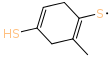

Group additivity:
	radical
		SJ-Cd = 1
	ring
		1,4-Cyclohexadiene = 1
	other
		R = 9
	group
		Cs-(Cds-Cds)(Cds-Cds)HH = 2
		Cds-CdsCsSs = 2
		Cds-CdsCsH = 1
		Cds-CdsCsCs = 1
		Cs-(Cds-Cds)HHH = 1
		Ss-CdH = 1

Uncertainty dG =  2.86138078556  kcal/mol
[CH2]C1SC2SC1=CC=2C(5292)


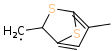

Group additivity:
	radical
		Cs_P = 1
	other
		R = 9
	group
		Ss-CdCd = 1
		Cds-Cds(Cds-Cds)H = 1
		Cs-CdsCsSsH = 1
		Ss-CsCd = 1
		Cds-CdsCsSs = 1
		Cds-CdsCsCs = 1
		Cs-(Cds-Cds)HHH = 1
		Cs-CsHHH = 1
	polycyclic
		PolycyclicRing = 1

Uncertainty dG =  2.8173569174  kcal/mol
C=C([S])CCC(C)=C=S(2880)


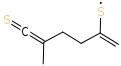

Group additivity:
	radical
		SJ-Cd = 1
	gauche
		Ss(RR) = 1
		Cs(CsRRR) = 2
		CsOsCdSs = 3
		Cs(RRRR) = 1
	group
		Cs-(Cds-Cds)CsHH = 2
		Cds-CdsHH = 1
		Cds-CdsCsSs = 1
		Ss-CsCs = 1
		Cdd-CdSd = 1
		Cds-CdsCsCs = 1
		Cs-(Cds-Cds)HHH = 1
		Ss-CdH = 1
	other
		R = 9

Uncertainty dG =  3.0  kcal/mol
Ne


Thermo Library:  2

Uncertainty dG =  2.0  kcal/mol
N2


Thermo Library:  3

Uncertainty dG =  2.0  kcal/mol
C=C([CH]SC(C)(C)C)CS(759)


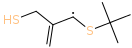

Group additivity:
	radical
		CsJ-CdSsH = 1
	gauche
		Cs(CsRRR) = 3
		Ss(CsH) = 1
		Cs(RRRR) = 3
		CsOsCdSs = 1
		Ss(CsCs) = 1
		Cd(CsCs) = 1
	group
		Cs-CdsSsHH = 1
		Cs-CsCsCsSs = 1
		Cds-CdsHH = 1
		Ss-CsH = 1
		Cds-CdsCsCs = 1
		Cs-CsHHH = 2
	other
		R = 10

Uncertainty dG =  3.2403703492  kcal/mol
[CH2]C(C)(C)SSC(=C)C(1436)


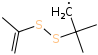

Group additivity:
	radical
		Cs_P = 1
	gauche
		Ss(RR) = 2
		Cs(RRRR) = 2
		CsOsCdSs = 2
		Cs(CsRRR) = 3
	group
		Cds-CdsHH = 1
		Cs-CsCsCsSs = 1
		Cs-CsHHH = 2
		Ss-SsCs = 1
		Cs-(Cds-Cds)HHH = 1
	other
		R = 9

Uncertainty dG =  3.03108891325  kcal/mol
DTBS(1)


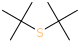

Group additivity:
	int15
		Ss(Cs(CsCsCs)Cs(CsCsCs)) = 1
	gauche
		Ss(CsCs) = 1
		Cs(RRRR) = 2
		Cs(CsRRR) = 6
	group
		Cs-CsCsCsSs = 2
		Cs-CsHHH = 4
	other
		R = 9

Uncertainty dG =  3.34477204006  kcal/mol
C[C](C)CSC1CCC(=S)CC=1C(3915)


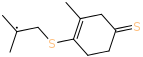

Group additivity:
	radical
		Tertalkyl = 1
	ring
		Cyclohexane = 1
	other
		R = 13
	group
		Sd-Cd = 1
		Cs-C=SCsHH = 1
		Cs-(Cds-Cds)CsHH = 1
		Cs-CsHHH = 2
		C=S-CsCs = 1
		Cs-CsCsCsH = 1
		Cs-(Cds-Cds)HHH = 1
		Cds-CdsCsSs = 1
		Cs-CsSsHH = 1
		Ss-CsCd = 1

Uncertainty dG =  3.70809924355  kcal/mol
CC1([C]=S)CCC(=S)C1(2962)


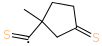

Group additivity:
	radical
		C=SJ-Cs = 1
	ring
		Cyclopentane = 1
	other
		R = 9
	group
		Sd-Cd = 2
		Cs-C=SCsCsCs = 1
		C=S-CsCs = 1
		Cs-CsCsHH = 1
		C=S-CsH = 1
		Cs-CsHHH = 1
		Cs-C=SCsHH = 2

Uncertainty dG =  2.87228132327  kcal/mol
CC1CC2=CC[C]1SS2(4039)


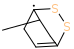

Group additivity:
	radical
		CsJ-CsCsSs = 1
	other
		R = 9
	group
		Cs-(Cds-Cds)CsHH = 1
		Cs-CsCsSsH = 1
		Cs-CsCsCsH = 1
		Cds-CdsCsSs = 1
		Cds-CdsCsH = 1
		Cs-CsHHH = 1
		Ss-SsCs = 1
	polycyclic
		PolycyclicRing = 1

Uncertainty dG =  2.80624304008  kcal/mol
H2S(2)


Thermo Library:  5

Uncertainty dG =  2.0  kcal/mol
C=C1[C]2SC(S)=C(C)C21(5546)


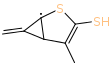

Group additivity:
	radical
		CsJ-CsCdSs = 1
	other
		R = 9
	group
		Cs-(Cds-Cds)HHH = 1
		Cds-CdsHH = 1
		Cs-(Cds-Cds)(Cds-Cds)CsH = 1
		Cs-CdsCsSsH = 1
		Ss-CsCd = 1
		Ss-CdH = 1
		Cds-CdsCsCs = 3
	polycyclic
		PolycyclicRing = 1

Uncertainty dG =  2.8939592257  kcal/mol
C=C1CCC(C)([C]=S)S1(2882)


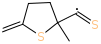

Group additivity:
	radical
		C=SJ-Cs = 1
	ring
		thiolane = 1
	other
		R = 9
	group
		Sd-Cd = 1
		Cs-(Cds-Cds)CsHH = 1
		Cs-CsCsHH = 1
		Cds-CdsHH = 1
		Cs-CsCsCsCs = 1
		Ss-CsCd = 1
		Cds-CdsCsSs = 1
		C=S-CsH = 1
		Cs-CsHHH = 1

Uncertainty dG =  2.82842712475  kcal/mol
C4H8(3)


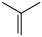

Group additivity:
	gauche
		Cs(RRRR) = 2
		CsOsCdSs = 1
		Cd(CsCs) = 1
	group
		Cs-(Cds-Cds)HHH = 2
		Cds-CdsHH = 1
		Cds-CdsCsCs = 1
	other
		R = 4

Uncertainty dG =  2.0  kcal/mol
CC[C]1SC(S)=C2CC12(5080)


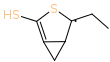

Group additivity:
	radical
		CsJ-CsCsSs = 1
	other
		R = 9
	group
		Cs-(Cds-Cds)CsCsH = 1
		Cs-CsCsSsH = 1
		Cs-CsCsHH = 1
		Ss-CsCd = 1
		Cds-CdsCsCs = 2
		Cs-CsHHH = 1
	polycyclic
		PolycyclicRing = 1

Uncertainty dG =  2.82842712475  kcal/mol
C=C(C)[CH]SS(290)


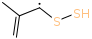

Group additivity:
	radical
		CsJ-CdSsH = 1
	gauche
		Ss(RR) = 2
		Cs(RRRR) = 2
		CsOsCdSs = 1
		Cd(CsCs) = 1
	group
		Cs-CdsSsHH = 1
		Cds-CdsHH = 1
		Ss-SsCs = 1
		Cs-(Cds-Cds)HHH = 1
	other
		R = 6

Uncertainty dG =  2.33184476327  kcal/mol
CC(=CSC(C)(C)C)CSC(C)(C)C(253)


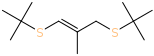

Group additivity:
	gauche
		Cs(CsRRR) = 6
		Cs(RRRR) = 4
		Ss(CsR) = 1
		CsOsCdSs = 1
		Ss(CsCs) = 1
		Cd(CsCs) = 1
	group
		Cs-CsCsCsSs = 2
		Ss-CsCs = 1
		Ss-CsCd = 1
		Cds-CdsSsH = 1
		Cds-CdsCsCs = 1
		Cs-(Cds-Cds)HHH = 1
		Cs-CsHHH = 4
	other
		R = 14

Uncertainty dG =  4.42295150324  kcal/mol
[CH2]C(=C)C[C](C=S)CS(1698)


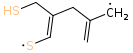

Group additivity:
	radical
		SJ-Cd = 1
		Allyl_P = 1
	gauche
		Ss(CsH) = 1
		Cs(RRRR) = 3
		Ss(RR) = 1
		CsOsCdSs = 2
		Cd(CsCs) = 2
	group
		Cs-CdsSsHH = 1
		Cs-(Cds-Cds)(Cds-Cds)HH = 1
		Cds-CdsHH = 1
		Cds-CdsCsCs = 2
		Ss-CsH = 1
		Cs-(Cds-Cds)HHH = 1
		Cds-CdsSsH = 1
		Ss-CdH = 1
	other
		R = 9

Uncertainty dG =  3.05163890393  kcal/mol
C4H9SH(4)


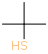

Thermo Library:  7

Uncertainty dG =  2.0  kcal/mol
C[C]1CSS1(551)


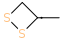

Group additivity:
	radical
		CsJ-CsCsSs = 1
	ring
		1,2-dithietane = 1
	other
		R = 5
	group
		Cs-CsHHH = 1
		Cs-CsCsSsH = 1
		Ss-SsCs = 2
		Cs-CsSsHH = 1

Uncertainty dG =  2.09165006634  kcal/mol
C=C[C]1SC(=S)[C]2CC12(5740)


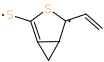

Group additivity:
	radical
		SJ-Cd = 1
		CsJ-CsCdSs = 1
	other
		R = 9
	group
		Cs-(Cds-Cds)CsCsH = 1
		Cs-(Cds-Cds)CsHH = 1
		Cds-CdsHH = 1
		Cs-CdsCsSsH = 1
		Ss-CsCd = 1
		Cds-CdsCsH = 1
		Cds-CdsCsCs = 1
		Ss-CdH = 1
	polycyclic
		PolycyclicRing = 1

Uncertainty dG =  2.82842712475  kcal/mol
C=C1CC[C]1CSC(=S)C(=C)C(1963)


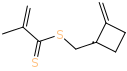

Group additivity:
	radical
		Allyl_T = 1
	ring
		methylenecyclobutane = 1
	other
		R = 12
	group
		Cs-(Cds-Cds)CsCsH = 1
		C=S-CsSs = 1
		Sd-Cd = 1
		Cs-(Cds-Cds)HHH = 1
		Cds-CdsHH = 2
		Cs-CsCsHH = 1
		Cs-(Cds-Cds)CsHH = 1
		Cds-CdsCsCs = 1
		Cds-CdsC=SCs = 1
		Ss-C=SCs = 1

Uncertainty dG =  3.49106001094  kcal/mol
C4H10(5)


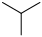

Group additivity:
	gauche
		Cs(CsCsCsR) = 1
		Cs(Cs(CsCsR)RRR) = 3
	group
		Cs-CsCsCsH = 1
		Cs-CsHHH = 2
	other
		R = 4

Uncertainty dG =  2.04633819297  kcal/mol
CCC12[CH]C1(C)C(=S)S2(4856)


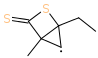

Group additivity:
	radical
		cyclopropane = 1
	other
		R = 9
	group
		Sd-Cd = 1
		Cs-C=SCsCsCs = 1
		Cs-CsCsCsSs = 1
		Cs-CsCsHH = 2
		Ss-C=SCs = 1
		Cs-CsHHH = 2
		C=S-CsSs = 1
	polycyclic
		PolycyclicRing = 1

Uncertainty dG =  2.87228132327  kcal/mol
CC1CC=C2CS[C]1S2(3326)


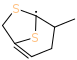

Group additivity:
	radical
		CsJ-CsSsSs = 1
	other
		R = 9
	group
		Cs-CdsSsHH = 1
		Cs-(Cds-Cds)CsHH = 1
		Cs-CsSsSsH = 1
		Ss-CsCs = 1
		Cs-CsCsCsH = 1
		Cds-CdsCsH = 1
		Cds-CdsCsSs = 1
		Cs-CsHHH = 1
		Ss-CsCd = 1
	polycyclic
		PolycyclicRing = 1

Uncertainty dG =  2.82842712475  kcal/mol
[CH2]C(C)(C)SC1SC(C=C)=CC=1C(5364)


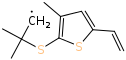

Group additivity:
	radical
		Cs_P = 1
	ring
		thiophene = 1
	other
		R = 13
	group
		Ss-CdCd = 1
		Cds-Cds(Cds-Cds)H = 2
		Cds-CdsHH = 1
		Cds-Cds(Cds-Cds)Cs = 1
		Ss-CsCd = 1
		Cs-CsCsCsSs = 1
		Cds-CdsCsCs = 2
		Cs-(Cds-Cds)HHH = 1
		Cs-CsHHH = 3

Uncertainty dG =  3.79143772203  kcal/mol
C=C1CC[C](C)C(=S)S1(2711)


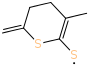

Group additivity:
	radical
		SJ-Cd = 1
	ring
		Cyclohexane = 1
	other
		R = 9
	group
		Ss-CdCd = 1
		Cds-CdsHH = 1
		Cds-CdsCsSs = 1
		Cs-(Cds-Cds)CsHH = 2
		Cds-CdsCsCs = 2
		Cs-(Cds-Cds)HHH = 1
		Ss-CdH = 1

Uncertainty dG =  2.87228132327  kcal/mol
S8(6)


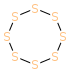

Thermo Library:  9

Uncertainty dG =  2.0  kcal/mol
C=C1CC[C]1CS[S](1852)


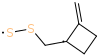

Group additivity:
	radical
		Allyl_T = 1
		SJ-Ss-Cs = 1
	ring
		methylenecyclobutane = 1
	other
		R = 8
	group
		Cs-(Cds-Cds)CsCsH = 1
		Cs-(Cds-Cds)CsHH = 1
		Cds-CdsHH = 1
		Ss-SsH = 1
		Ss-SsCs = 1
		Cds-CdsCsCs = 1
		Cs-CsCsHH = 1

Uncertainty dG =  2.62202212043  kcal/mol
CC(=CSC(C)(C)C)C[S](561)


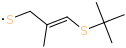

Group additivity:
	radical
		SJ-Cs = 1
	gauche
		Cs(CsRRR) = 3
		Ss(CsH) = 1
		Ss(CsR) = 1
		CsOsCdSs = 1
		Cs(RRRR) = 3
		Cd(CsCs) = 1
	group
		Cs-CdsSsHH = 1
		Cs-CsCsCsSs = 1
		Ss-CsCd = 1
		Cds-CdsSsH = 1
		Cds-CdsCsCs = 1
		Cs-CsHHH = 2
		Ss-CsH = 1
	other
		R = 10

Uncertainty dG =  3.25  kcal/mol
CC[C]1SC2SC1C=2C(4832)


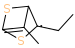

Group additivity:
	radical
		CsJ-CsCsSs = 1
	other
		R = 9
	group
		Cs-(Cds-Cds)HHH = 1
		Cs-CsCsSsH = 1
		Cs-CsCsHH = 1
		Cs-CdsCsSsH = 1
		Ss-CsCd = 1
		Cds-CdsCsCs = 2
		Cs-CsHHH = 1
	polycyclic
		PolycyclicRing = 1

Uncertainty dG =  2.8394541729  kcal/mol
C=[C]CSC(=S)C(=C)C(1718)


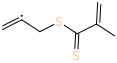

Group additivity:
	radical
		Cds_S = 1
	gauche
		Cs(RRRR) = 2
		CsOsCdSs = 4
		Ss(RR) = 1
	group
		Cs-CdsSsHH = 1
		C=S-CsSs = 1
		Sd-Cd = 1
		Cs-(Cds-Cds)HHH = 1
		Cds-CdsHH = 2
		Ss-C=SCs = 1
		Cds-CdsCsH = 1
	other
		R = 9

Uncertainty dG =  3.05163890393  kcal/mol
S6J(7)


Group additivity:
	radical
		SJ-Ss-Ss = 2
	gauche
		Ss(RR) = 6
	group
		Ss-SsSs = 4
		Ss-SsH = 2
	other
		R = 6

Uncertainty dG =  2.87228132327  kcal/mol
[CH2]C1CSSCC=1[CH2](2071)


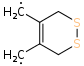

Group additivity:
	radical
		Allyl_P = 2
	ring
		Cyclohexane = 1
	other
		R = 8
	group
		Cs-CdsSsHH = 2
		Cds-CdsCsCs = 2
		Ss-SsCs = 2
		Cs-(Cds-Cds)HHH = 1

Uncertainty dG =  2.7156951228  kcal/mol
C[C]1CC(=S)C2CC12S(3705)


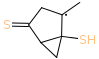

Group additivity:
	radical
		Tertalkyl = 1
	other
		R = 9
	group
		Sd-Cd = 1
		Cs-C=SCsHH = 1
		Cs-CsCsCsSs = 1
		Cs-CsCsHH = 1
		Cs-CsCsCsH = 1
		Cs-C=SCsCsH = 1
		C=S-CsCs = 1
		Cs-CsHHH = 1
		Ss-CsH = 1
	polycyclic
		PolycyclicRing = 1

Uncertainty dG =  2.82842712475  kcal/mol
CC(=C=S)C[S](976)


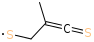

Group additivity:
	radical
		SJ-Cs = 1
	gauche
		Cs(RRRR) = 2
		CsOsCdSs = 1
		Ss(CsH) = 1
	group
		Cs-CdsSsHH = 1
		Ss-CsCs = 1
		Ss-CsH = 1
		Cdd-CdSd = 1
		Cs-(Cds-Cds)HHH = 1
	other
		R = 6

Uncertainty dG =  2.29128784748  kcal/mol
[CH2]C(=C)C[C](C)C=S(1668)


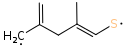

Group additivity:
	radical
		SJ-Cd = 1
		Allyl_P = 1
	gauche
		Ss(RR) = 1
		Cs(RRRR) = 3
		CsOsCdSs = 2
		Cd(CsCs) = 2
	group
		Cs-(Cds-Cds)(Cds-Cds)HH = 1
		Cds-CdsSsH = 1
		Cds-CdsHH = 1
		Ss-CdH = 1
		Cds-CdsCsCs = 2
		Cs-(Cds-Cds)HHH = 2
	other
		R = 8

Uncertainty dG =  2.87228132327  kcal/mol
[CH2]C=C1C=C(C)C(=S)S1(5247)


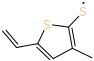

Group additivity:
	radical
		SJ-Cd = 1
	ring
		thiophene = 1
	other
		R = 9
	group
		Ss-CdCd = 1
		Cs-(Cds-Cds)HHH = 1
		Cds-CdsHH = 1
		Cds-Cds(Cds-Cds)Cs = 1
		Cds-Cds(Cds-Cds)H = 1
		Cds-CdsCsCs = 2
		Ss-CdH = 1

Uncertainty dG =  2.8394541729  kcal/mol
C=C(C)C([S])(S)C(C)(C)C(537)


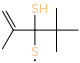

Group additivity:
	radical
		SJ-Cs = 1
	gauche
		Ss(CsH) = 2
		Cs(Cs(CsCsCs)RRR) = 3
		CsOsCdSs = 1
		Cs(CsCsCsCs) = 1
		Cs(RRRR) = 2
		Cd(CsCs) = 1
	group
		Cs-(Cds-Cds)HHH = 1
		Cds-CdsCsCs = 1
		Ss-CsH = 2
		Cs-CsCsCsCs = 2
		Cs-CsHHH = 2
	other
		R = 10

Uncertainty dG =  3.26917420766  kcal/mol
C=C1[CH]CC(C)C(=S)S1(2878)


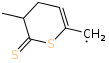

Group additivity:
	radical
		Allyl_P = 1
	ring
		Cyclohexane = 1
	other
		R = 9
	group
		C=S-CsSs = 1
		Cs-(Cds-Cds)CsHH = 1
		Ss-C=SCd = 1
		Cs-CsHHH = 1
		Cds-CdsCsSs = 1
		Cds-CdsCsH = 1
		Cs-C=SCsCsH = 1

Uncertainty dG =  2.80624304008  kcal/mol
C=C(C)C(=S)SC(C)(C)C(393)


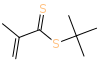

Group additivity:
	gauche
		Ss(RR) = 1
		Cs(RRRR) = 2
		CsOsCdSs = 2
		Cs(CsRRR) = 3
	group
		Sd-Cd = 1
		C=S-CsSs = 1
		Cs-CsCsCsSs = 1
		Cds-CdsHH = 1
		Cs-(Cds-Cds)HHH = 1
		Ss-C=SCs = 1
		Cs-CsHHH = 2
	other
		R = 10

Uncertainty dG =  3.20156211872  kcal/mol
C[C](C)C(22)


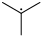

Group additivity:
	radical
		Tertalkyl = 1
	gauche
		Cs(CsCsCsR) = 1
		Cs(Cs(CsCsR)RRR) = 3
	group
		Cs-CsCsCsH = 1
		Cs-CsHHH = 2
	other
		R = 4

Uncertainty dG =  2.06155281281  kcal/mol
S6(9)


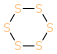

Thermo Library:  12

Uncertainty dG =  2.0  kcal/mol
[CH2]C1CC(=C)SC2SC1=CC=2C(6292)


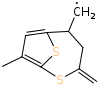

Group additivity:
	radical
		Isobutyl = 1
	other
		R = 12
	group
		Ss-CdCd = 2
		Cs-(Cds-Cds)CsCsH = 1
		Cds-Cds(Cds-Cds)Cs = 1
		Cds-CdsHH = 1
		Cds-Cds(Cds-Cds)H = 1
		Cs-(Cds-Cds)CsHH = 1
		Cds-CdsCsSs = 2
		Cds-CdsCsCs = 1
		Cs-CsHHH = 1
	polycyclic
		PolycyclicRing = 1

Uncertainty dG =  3.5089172119  kcal/mol
CC1=C[C]2CCC1(S)S2(4510)


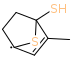

Group additivity:
	radical
		CsJ-CsCdSs = 1
	other
		R = 9
	group
		Ss-CsCs = 1
		Cs-(Cds-Cds)HHH = 1
		Cs-CsCsHH = 2
		Cs-CdsCsSsH = 1
		Cds-CdsCsCs = 1
		Cds-CdsCsH = 1
		Cs-CsCsCsCs = 1
	polycyclic
		PolycyclicRing = 1

Uncertainty dG =  2.8394541729  kcal/mol
S4(11)


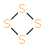

Thermo Library:  14

Uncertainty dG =  2.0  kcal/mol
C=C[C]1SC2SC1C=2C(5290)


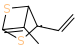

Group additivity:
	radical
		CsJ-CsCdSs = 1
	other
		R = 9
	group
		Cs-(Cds-Cds)HHH = 1
		Cds-CdsHH = 1
		Cs-CdsCsSsH = 2
		Ss-CsCd = 1
		Cds-CdsCsH = 1
		Cds-CdsCsCs = 1
	polycyclic
		PolycyclicRing = 1

Uncertainty dG =  2.82842712475  kcal/mol
C[C]1CC2=CCC1(S)S2(3581)


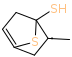

Group additivity:
	radical
		Tertalkyl = 1
	other
		R = 9
	group
		Cs-(Cds-Cds)CsHH = 1
		Cs-CsCsSsSs = 1
		Cs-CsCsCsH = 1
		Cds-CdsCsSs = 1
		Cds-CdsCsH = 1
		Cs-CsHHH = 1
		Ss-CsCd = 1
	polycyclic
		PolycyclicRing = 1

Uncertainty dG =  2.80624304008  kcal/mol
S4J(10)


Group additivity:
	radical
		SJ-Ss-Ss = 2
	gauche
		Ss(RR) = 4
	group
		Ss-SsSs = 2
		Ss-SsH = 2
	other
		R = 4

Uncertainty dG =  2.2360679775  kcal/mol
C1CC2CSSCC=21(2064)


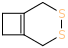

Group additivity:
	other
		R = 8
	group
		Cs-(Cds-Cds)CsHH = 2
		Cds-CdsCsCs = 2
		Ss-SsCs = 2
		Cs-CdsSsHH = 1
	polycyclic
		PolycyclicRing = 1

Uncertainty dG =  2.66926956301  kcal/mol
C=C1[CH]C2(CC)SC12S(5102)


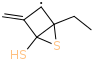

Group additivity:
	radical
		Allyl_S = 1
	other
		R = 9
	group
		Cs-CsCsCsSs = 1
		Cs-CsCsHH = 1
		Cds-CdsHH = 1
		Cs-CsCsCsCs = 1
		Ss-CsCs = 1
		Cds-CdsCsCs = 1
		Cs-CsHHH = 1
	polycyclic
		PolycyclicRing = 1

Uncertainty dG =  2.80624304008  kcal/mol
C[C](C)CS(28)


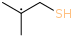

Group additivity:
	radical
		Tertalkyl = 1
	gauche
		Ss(Cs(CsHH)H) = 1
		Cs(CsCsCsR) = 1
		Cs(Cs(CsCsR)RRR) = 2
		Cs(RRRR) = 1
	group
		Cs-CsHHH = 1
		Ss-CsH = 1
		Cs-CsCsCsH = 1
		Cs-CsSsHH = 1
	other
		R = 5

Uncertainty dG =  2.13600093633  kcal/mol
C[C](CS)CSC(C)(C)C(148)


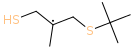

Group additivity:
	radical
		Tertalkyl = 1
	gauche
		Cs(CsRRR) = 3
		Cs(RRRR) = 3
		Ss(Cs(CsHH)H) = 1
		Cs(Cs(CsCsR)RRR) = 1
		Ss(CsCs) = 1
		Cs(CsCsCsR) = 1
	group
		Cs-CsCsCsSs = 1
		Cs-CsHHH = 3
		Ss-CsH = 1
		Cs-CsCsCsH = 1
		Cs-CsSsHH = 1
	other
		R = 10

Uncertainty dG =  3.27871926215  kcal/mol
C=C(C)C[S](133)


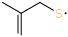

Group additivity:
	gauche
		Ss(CsH) = 1
		Cs(RRRR) = 2
		CsOsCdSs = 1
		Cd(CsCs) = 1
	group
		Cs-CdsSsHH = 1
		Ss-CsH = 1
		Cds-CdsHH = 1
		Cs-(Cds-Cds)HHH = 1
	other
		R = 5

Uncertainty dG =  2.12132034356  kcal/mol
[CH2]C(=C)S[C](C(=C)C)C(C)(C)C(1751)


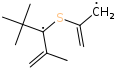

Group additivity:
	radical
		Allyl_P = 1
		CsJ-CsCdSs = 1
	gauche
		Ss(CsR) = 1
		CsOsCdSs = 3
		Cs(CsCsCsCs) = 1
		Cs(RRRR) = 3
		Cs(Cs(CsCsCs)RRR) = 3
		Cd(CsCs) = 1
	group
		Cs-(Cds-Cds)HHH = 2
		Cds-CdsHH = 2
		Cs-CsHHH = 2
		Cs-CdsCsSsH = 1
		Ss-CsCd = 1
		Cds-CdsCsCs = 1
		Cds-CdsCsSs = 1
		Cs-CsCsCsCs = 1
	other
		R = 12

Uncertainty dG =  3.78318648761  kcal/mol
C4H9SJ(15)


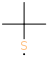

Thermo Library:  18

Uncertainty dG =  2.0  kcal/mol
CC(CSC(C)(C)C)=C(S)C(C)(C)C(6115)


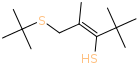

Group additivity:
	gauche
		Cs(CsRRR) = 3
		Ss(CsCs) = 1
		Ss(RR) = 1
		CsOsCdSs = 1
		Cs(Cs(CsCsR)RRR) = 3
		Cs(RRRR) = 3
		Cd(CsCs) = 1
		Cs(CsCsCsR) = 1
	group
		Cs-CdsSsHH = 1
		Cs-(Cds-Cds)CsCsCs = 1
		Ss-CsCs = 1
		Cs-(Cds-Cds)HHH = 1
		Cds-CdsCsSs = 1
		Cs-CsCsCsSs = 1
		Cs-CsHHH = 5
	other
		R = 14

Uncertainty dG =  4.29389100933  kcal/mol
SC1CC[C]2CC=1CS2(4411)


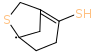

Group additivity:
	radical
		CsJ-CsCsSs = 1
	other
		R = 9
	group
		Cs-CdsSsHH = 1
		Cs-(Cds-Cds)CsHH = 1
		Cs-CsCsSsH = 1
		Ss-CsCs = 1
		Cds-CdsCsSs = 1
		Cds-CdsCsCs = 1
		Cs-CsCsHH = 1
		Ss-CdH = 1
	polycyclic
		PolycyclicRing = 1

Uncertainty dG =  2.8173569174  kcal/mol
[CH2]C(C)(S)CS(188)


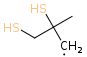

Group additivity:
	radical
		Cs_P = 1
	gauche
		Ss(Cs(CsHH)H) = 1
		Cs(RRRR) = 2
		Ss(CsH) = 1
		Cs(CsRRR) = 2
	group
		Cs-CsCsCsSs = 1
		Ss-CsH = 2
		Cs-CsSsHH = 1
		Cs-CsHHH = 1
	other
		R = 6

Uncertainty dG =  2.37170824513  kcal/mol
CC=C1C=C(C)C(=S)S1(4857)


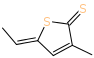

Group additivity:
	ring
		2,5-dihydrothiophene = 1
	other
		R = 9
	group
		Sd-Cd = 1
		C=S-CsSs = 1
		Cds-Cds(Cds-Cds)H = 1
		Ss-C=SCd = 1
		Cs-(Cds-Cds)HHH = 2
		Cds-CdsCsH = 1
		Cds-CdsC=SCs = 1

Uncertainty dG =  2.82842712475  kcal/mol
CC(=S)[CH]CC(C)=C=S(3017)


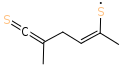

Group additivity:
	radical
		SJ-Cd = 1
	gauche
		Cs(RRRR) = 3
		CsOsCdSs = 3
		Ss(RR) = 1
	group
		Cs-(Cds-Cds)(Cds-Cds)HH = 1
		Cds-CdsCsSs = 1
		Ss-CsCs = 1
		Cds-CdsCsH = 1
		Cds-CdsCsCs = 1
		Cs-(Cds-Cds)HHH = 2
		Cdd-CdSd = 1
		Ss-CdH = 1
	other
		R = 9

Uncertainty dG =  3.04138126515  kcal/mol
C[C](CSC(C)(C)C)C(=S)C(C)(C)C(1429)


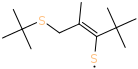

Group additivity:
	radical
		SJ-Cd = 1
	gauche
		Cs(CsRRR) = 3
		Ss(CsCs) = 1
		Ss(RR) = 1
		CsOsCdSs = 1
		Cs(Cs(CsCsR)RRR) = 3
		Cs(RRRR) = 3
		Cd(CsCs) = 1
		Cs(CsCsCsR) = 1
	group
		Cs-CdsSsHH = 1
		Cs-(Cds-Cds)CsCsCs = 1
		Ss-CsCs = 1
		Cs-(Cds-Cds)HHH = 1
		Cds-CdsCsSs = 1
		Cs-CsCsCsSs = 1
		Cs-CsHHH = 5
	other
		R = 14

Uncertainty dG =  4.30116263352  kcal/mol
CC12CC[C](C1)SC2=S(2830)


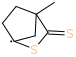

Group additivity:
	radical
		CsJ-CsCsSs = 1
	other
		R = 9
	group
		Sd-Cd = 1
		Cs-C=SCsCsCs = 1
		Cs-CsCsSsH = 1
		Cs-CsCsHH = 3
		Ss-C=SCs = 1
		Cs-CsHHH = 1
		C=S-CsSs = 1
	polycyclic
		PolycyclicRing = 1

Uncertainty dG =  2.8939592257  kcal/mol
C[C](C)CS[S](140)


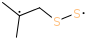

Group additivity:
	radical
		SJ-Ss-Cs = 1
		Tertalkyl = 1
	gauche
		Ss(RR) = 2
		Cs(CsCsCsR) = 1
		Cs(Cs(CsCsR)RRR) = 2
		Cs(RRRR) = 1
	group
		Cs-CsHHH = 1
		Ss-SsH = 1
		Cs-CsCsCsH = 1
		Ss-SsCs = 1
		Cs-CsSsHH = 1
	other
		R = 6

Uncertainty dG =  2.35849528301  kcal/mol
CC=C1[CH]C(C)=C(S)S1(3586)


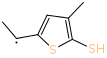

Group additivity:
	radical
		Allyl_S = 1
	ring
		thiophene = 1
	other
		R = 9
	group
		Ss-CdCd = 1
		Cds-Cds(Cds-Cds)H = 1
		Cds-CdsCsSs = 1
		Cs-(Cds-Cds)CsHH = 1
		Cds-CdsCsCs = 1
		Cs-(Cds-Cds)HHH = 1
		Cs-CsHHH = 1
		Ss-CdH = 1

Uncertainty dG =  2.8173569174  kcal/mol
[CH2]C1CC2C=C1SC=2[S](5788)


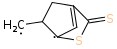

Group additivity:
	radical
		CsJ-CsCdSs = 1
		Isobutyl = 1
	other
		R = 9
	group
		C=S-CsSs = 1
		Cs-(Cds-Cds)CsHH = 1
		Cs-CdsCsSsH = 1
		Cs-CsCsCsH = 1
		Ss-C=SCs = 1
		Cds-CdsCsH = 1
		Cds-CdsC=SCs = 1
	polycyclic
		PolycyclicRing = 1

Uncertainty dG =  2.8173569174  kcal/mol
[CH2]C(C)(C)SC(C)(C)C(23)


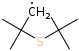

Group additivity:
	int15
		Ss(Cs(CsCsCs)Cs(CsCsCs)) = 1
	radical
		Cs_P = 1
	gauche
		Ss(CsCs) = 1
		Cs(RRRR) = 2
		Cs(CsRRR) = 6
	group
		Cs-CsCsCsSs = 2
		Cs-CsHHH = 4
	other
		R = 9

Uncertainty dG =  3.35410196625  kcal/mol
C=CC1=CC(C)=C(SC[C](C)C)S1(5365)


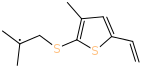

Group additivity:
	radical
		Tertalkyl = 1
	ring
		thiophene = 1
	other
		R = 13
	group
		Ss-CdCd = 1
		Cs-(Cds-Cds)HHH = 1
		Cds-CdsHH = 1
		Cs-CsSsHH = 1
		Cds-Cds(Cds-Cds)H = 2
		Cs-CsCsCsH = 1
		Cds-Cds(Cds-Cds)Cs = 1
		Cds-CdsCsCs = 2
		Cs-CsHHH = 2
		Ss-CsCd = 1

Uncertainty dG =  3.75832409459  kcal/mol
C=C1CC[C]1CSSC(C)(C)C(1885)


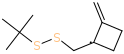

Group additivity:
	radical
		Allyl_T = 1
	ring
		methylenecyclobutane = 1
	other
		R = 12
	group
		Cs-(Cds-Cds)CsCsH = 1
		Cs-CsCsCsSs = 1
		Cs-CsCsHH = 1
		Cds-CdsHH = 1
		Cs-CsHHH = 3
		Ss-SsCs = 2
		Cs-CsSsHH = 1

Uncertainty dG =  3.53553390593  kcal/mol
C[C](C)CSC1=CCC(S)=C(C)C1(3724)


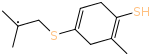

Group additivity:
	radical
		Tertalkyl = 1
	ring
		1,4-Cyclohexadiene = 1
	other
		R = 13
	group
		Cs-(Cds-Cds)(Cds-Cds)HH = 1
		Cds-CdsCsSs = 2
		Cs-CsSsHH = 1
		Cds-CdsCsH = 1
		Cs-CsCsCsH = 1
		Cs-(Cds-Cds)HHH = 1
		Cds-CdsCsCs = 1
		Ss-CdH = 1
		Cs-CsHHH = 2
		Ss-CsCd = 1

Uncertainty dG =  3.73329613077  kcal/mol
C=C(C[S])CSC(C)(C)C(763)


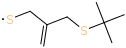

Group additivity:
	radical
		SJ-Cs = 1
	gauche
		Cs(CsRRR) = 3
		Ss(CsH) = 1
		Cs(RRRR) = 3
		CsOsCdSs = 1
		Ss(CsCs) = 1
		Cd(CsCs) = 1
	group
		Cs-CdsSsHH = 1
		Cs-CsCsCsSs = 1
		Cds-CdsHH = 1
		Ss-CsH = 1
		Cds-CdsCsCs = 1
		Cs-CsHHH = 2
	other
		R = 10

Uncertainty dG =  3.2403703492  kcal/mol
CC1CC2(S)[CH]CC=1S2(4122)


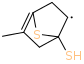

Group additivity:
	radical
		Cs_S = 1
	other
		R = 9
	group
		Cs-(Cds-Cds)CsHH = 1
		Cs-CsCsHH = 1
		Cds-CdsCsCs = 1
		Ss-CsCd = 1
		Cs-(Cds-Cds)HHH = 1
		Cds-CdsCsSs = 1
		Cs-CsCsSsSs = 1
		Ss-CsH = 1
	polycyclic
		PolycyclicRing = 1

Uncertainty dG =  2.8173569174  kcal/mol
CC(C)(C)S[S](80)


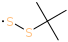

Thermo Library:  28
Group additivity:
	radical
		SJ-Ss-Cs = 1

Uncertainty dG =  2.51246890528  kcal/mol
C[C]1SC2SC1CC=2C(3178)


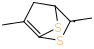

Group additivity:
	radical
		CsJ-CsCsSs = 1
	other
		R = 9
	group
		Cs-(Cds-Cds)CsHH = 1
		Cs-CsCsSsH = 2
		Ss-CsCd = 1
		Cs-(Cds-Cds)HHH = 1
		Cds-CdsCsCs = 2
		Cs-CsHHH = 1
	polycyclic
		PolycyclicRing = 1

Uncertainty dG =  2.86138078556  kcal/mol
C[C](C)CSS(192)


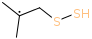

Group additivity:
	radical
		Tertalkyl = 1
	gauche
		Ss(RR) = 2
		Cs(CsCsCsR) = 1
		Cs(Cs(CsCsR)RRR) = 2
		Cs(RRRR) = 1
	group
		Cs-CsHHH = 1
		Ss-SsH = 1
		Cs-CsCsCsH = 1
		Ss-SsCs = 1
		Cs-CsSsHH = 1
	other
		R = 6

Uncertainty dG =  2.34520787991  kcal/mol
[S]S(64)


Thermo Library:  29

Uncertainty dG =  2.0  kcal/mol
[CH2]SC(=C)CSC(C)(C)C(792)


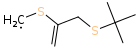

Group additivity:
	radical
		CsJ-SsHH = 1
	gauche
		Ss(CsCs) = 1
		Cs(RRRR) = 3
		Ss(CsR) = 1
		CsOsCdSs = 2
		Cs(CsRRR) = 3
	group
		Cs-CdsSsHH = 1
		Cs-CsCsCsSs = 1
		Cds-CdsHH = 1
		Ss-CsCd = 1
		Cds-CdsCsSs = 1
		Cs-CsHHH = 2
	other
		R = 10

Uncertainty dG =  3.2596012026  kcal/mol
C=CC1=C[C](CC[C](C)C)C(=S)S1(5744)


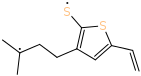

Group additivity:
	radical
		SJ-Cd = 1
		Tertalkyl = 1
	ring
		thiophene = 1
	other
		R = 13
	group
		Ss-CdCd = 1
		Cs-(Cds-Cds)CsHH = 1
		Cds-CdsHH = 1
		Cs-CsCsHH = 1
		Cds-Cds(Cds-Cds)H = 2
		Cs-CsCsCsH = 1
		Cds-Cds(Cds-Cds)Cs = 1
		Cds-CdsCsCs = 2
		Cs-CsHHH = 2
		Ss-CdH = 1

Uncertainty dG =  3.76662979333  kcal/mol
CC1CC(=S)CCC=1[S](3711)


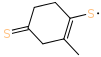

Group additivity:
	radical
		SJ-Cd = 1
	ring
		Cyclohexane = 1
	other
		R = 9
	group
		Cs-C=SCsHH = 1
		Cs-(Cds-Cds)CsHH = 1
		Cds-CdsCsSs = 1
		C=S-CsCs = 1
		Cds-CdsCsCs = 1
		Cs-CsCsHH = 1
		Ss-CdH = 1

Uncertainty dG =  2.80624304008  kcal/mol
[CH2]C1(C)CC(=C)SC1=S(2699)


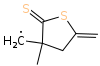

Group additivity:
	radical
		Neopentyl = 1
	ring
		thiolane = 1
	other
		R = 9
	group
		Sd-Cd = 1
		C=S-CsSs = 1
		Cs-(Cds-Cds)CsHH = 1
		Cds-CdsHH = 1
		Ss-C=SCd = 1
		Cds-CdsCsSs = 1
		Cs-CsHHH = 2
		Cs-C=SCsCsCs = 1

Uncertainty dG =  2.85043856275  kcal/mol
C=C(C)[CH]SC(C)(C)C(135)


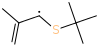

Group additivity:
	radical
		CsJ-CdSsH = 1
	gauche
		Ss(CsCs) = 1
		Cs(RRRR) = 3
		CsOsCdSs = 1
		Cd(CsCs) = 1
		Cs(CsRRR) = 3
	group
		Cs-CdsSsHH = 1
		Cs-CsCsCsSs = 1
		Cds-CdsHH = 1
		Ss-CsCs = 1
		Cds-CdsCsCs = 1
		Cs-CsHHH = 2
	other
		R = 9

Uncertainty dG =  3.04138126515  kcal/mol
[CH2]C(C)(S)CSC(C)(C)C(147)


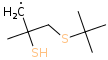

Group additivity:
	radical
		Cs_P = 1
	gauche
		Ss(CsCs) = 1
		Cs(RRRR) = 3
		Ss(CsH) = 1
		Cs(CsRRR) = 5
	group
		Cs-CsCsCsSs = 2
		Cs-CsHHH = 4
		Ss-CsH = 1
	other
		R = 10

Uncertainty dG =  3.4820970693  kcal/mol
[CH2]C1CC(S)=CCC=1S(3678)


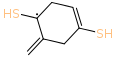

Group additivity:
	radical
		CsJ-CsCdSs = 1
	ring
		Cyclohexane = 1
	other
		R = 9
	group
		Cs-(Cds-Cds)(Cds-Cds)HH = 1
		Cds-CdsHH = 1
		Cds-CdsCsSs = 1
		Cs-CdsCsSsH = 1
		Cs-(Cds-Cds)CsHH = 1
		Cds-CdsCsH = 1
		Cds-CdsCsCs = 1
		Ss-CdH = 1
		Ss-CsH = 1

Uncertainty dG =  2.82842712475  kcal/mol
[CH2]C(C)(C)SS(100)


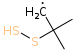

Thermo Library:  28
Group additivity:
	radical
		Cs_P = 1

Uncertainty dG =  2.51246890528  kcal/mol
CC1[CH]C2(CC2)SC=1S(4746)


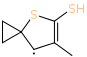

Group additivity:
	radical
		Allyl_S = 1
	other
		R = 9
	group
		Cs-CsCsCsSs = 1
		Ss-CsCd = 1
		Ss-CdH = 1
		Cds-CdsCsCs = 2
		Cs-(Cds-Cds)HHH = 1
		Cs-CsCsHH = 2
	polycyclic
		PolycyclicRing = 1

Uncertainty dG =  2.86138078556  kcal/mol
C=C(C)[C]1SCC(C)(C)S1(1099)


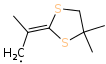

Group additivity:
	radical
		Allyl_P = 1
	ring
		1,3-dithiolane = 1
	other
		R = 10
	group
		Cs-CsCsCsSs = 1
		Cs-CsHHH = 2
		Ss-CsCd = 2
		Cs-(Cds-Cds)HHH = 2
		Cds-CdsCsCs = 2
		Cs-CsSsHH = 1

Uncertainty dG =  3.1224989992  kcal/mol
C=C(C=S)CS(860)


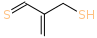

Group additivity:
	gauche
		Cs(RRRR) = 1
		CsOsCdSs = 2
		Ss(CsH) = 1
	group
		Cs-CdsSsHH = 1
		Sd-Cd = 1
		Cds-CdsHH = 1
		C=S-CdsH = 1
		Ss-CsH = 1
		Cds-CdsC=SCs = 1
	other
		R = 6

Uncertainty dG =  2.29128784748  kcal/mol
CC1CC2CC=1S[C]2S(4319)


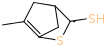

Group additivity:
	radical
		CsJ-CsSsSs = 1
	other
		R = 9
	group
		Ss-CsH = 1
		Cs-(Cds-Cds)CsHH = 2
		Ss-CsCd = 1
		Cds-CdsCsSs = 1
		Cds-CdsCsCs = 1
		Cs-(Cds-Cds)HHH = 1
		Cs-CsCsCsH = 1
	polycyclic
		PolycyclicRing = 1

Uncertainty dG =  2.8394541729  kcal/mol
C=C(C)SSC[C](C)C(1437)


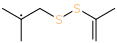

Group additivity:
	radical
		Tertalkyl = 1
	gauche
		Ss(RR) = 2
		Cs(CsCsCsR) = 1
		CsOsCdSs = 2
		Cs(Cs(CsCsR)RRR) = 2
		Cs(RRRR) = 2
	group
		Cs-(Cds-Cds)HHH = 1
		Cds-CdsHH = 1
		Cs-CsSsHH = 1
		Cs-CsCsCsH = 1
		Ss-SsCd = 1
		Ss-SsCs = 1
		Cds-CdsCsSs = 1
		Cs-CsHHH = 1
	other
		R = 9

Uncertainty dG =  2.98956518578  kcal/mol
C=C1CS[C](S1)C(=C)C(2620)


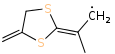

Group additivity:
	radical
		Allyl_P = 1
	ring
		1,3-dithiolane = 1
	other
		R = 9
	group
		Cs-CdsSsHH = 1
		Cs-(Cds-Cds)HHH = 2
		Cds-CdsHH = 1
		Ss-CsCd = 1
		Cds-CdsCsSs = 1
		Cds-CdsCsCs = 1

Uncertainty dG =  2.82842712475  kcal/mol
C=CC12[CH]C(=C)[C](S1)S2(5738)


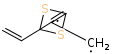

Group additivity:
	radical
		Allyl_S = 1
		Allyl_P = 1
	other
		R = 9
	group
		Cs-(Cds-Cds)CsHH = 1
		Cds-CdsHH = 1
		Ss-CsCd = 2
		Cds-CdsCsH = 1
		Cds-CdsCsCs = 1
		Cs-(Cds-Cds)HHH = 1
		Cs-CsCsCsCs = 1
	polycyclic
		PolycyclicRing = 1

Uncertainty dG =  2.85043856275  kcal/mol
CC12CC(=CC[C]1S)S2(3662)


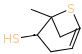

Group additivity:
	radical
		CsJ-CsCsSs = 1
	other
		R = 9
	group
		Cs-CsCsCsSs = 1
		Cs-CsCsSsH = 1
		Cs-(Cds-Cds)CsHH = 1
		Cds-CdsCsSs = 1
		Cds-CdsCsH = 1
		Cs-CsHHH = 1
		Ss-CsCd = 1
	polycyclic
		PolycyclicRing = 1

Uncertainty dG =  2.80624304008  kcal/mol
C=C([C]=S)CS(931)


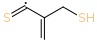

Group additivity:
	gauche
		Cs(RRRR) = 1
		CsOsCdSs = 2
		Ss(CsH) = 1
	group
		Cs-CdsSsHH = 1
		Sd-Cd = 1
		Ss-CsH = 1
		Cds-CdsC=SCs = 1
		C=S-CdsH = 1
	other
		R = 6

Uncertainty dG =  2.27760839479  kcal/mol
C=[C]CSC1SC(C=C)=CC=1C(5406)


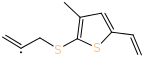

Group additivity:
	radical
		Cds_S = 1
	ring
		thiophene = 1
	other
		R = 12
	group
		Ss-CdCd = 1
		Cs-CdsSsHH = 1
		Cds-Cds(Cds-Cds)Cs = 1
		Cds-CdsHH = 2
		Cds-Cds(Cds-Cds)H = 1
		Cds-CdsCsH = 1
		Cds-CdsCsCs = 1
		Cs-(Cds-Cds)HHH = 1
		Ss-CsCd = 1

Uncertainty dG =  3.4820970693  kcal/mol
CC1=CCC(C)=C([S])S1(3118)


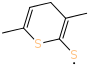

Group additivity:
	radical
		SJ-Cd = 1
	ring
		Cyclohexane = 1
	other
		R = 9
	group
		Ss-CdCd = 1
		Cds-CdsCsSs = 1
		Cds-CdsCsH = 1
		Cs-(Cds-Cds)(Cds-Cds)HH = 1
		Cds-CdsCsCs = 2
		Cs-(Cds-Cds)HHH = 2
		Ss-CdH = 1

Uncertainty dG =  2.87228132327  kcal/mol
C=CC12[CH]C(C)=C(S1)S2(5291)


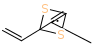

Group additivity:
	radical
		Allyl_S = 1
	other
		R = 9
	group
		Cs-(Cds-Cds)CsHH = 1
		Cds-CdsHH = 1
		Ss-CsCd = 2
		Cds-CdsCsH = 1
		Cds-CdsCsCs = 1
		Cs-(Cds-Cds)HHH = 1
		Cs-CsCsCsCs = 1
	polycyclic
		PolycyclicRing = 1

Uncertainty dG =  2.8394541729  kcal/mol
[CH2]C1(C)C=C(C)SC1=S(3251)


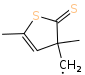

Group additivity:
	radical
		Neopentyl = 1
	ring
		2,3-dihydrothiophene = 1
	other
		R = 9
	group
		Sd-Cd = 1
		C=S-CsSs = 1
		Cs-(Cds-Cds)HHH = 1
		Ss-C=SCd = 1
		Cs-CsHHH = 2
		Cds-CdsCsSs = 1
		Cds-CdsCsH = 1
		Cs-CsCsCsCs = 1

Uncertainty dG =  2.85043856275  kcal/mol
C=CC12[CH]C1(C)C(=S)S2(5334)


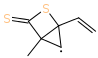

Group additivity:
	radical
		cyclopropane = 1
	other
		R = 9
	group
		Sd-Cd = 1
		Cs-CsCsCsCs = 1
		Cs-C=SCsCsCs = 1
		Cds-CdsHH = 1
		Cs-CsCsHH = 1
		Ss-C=SCs = 1
		Cds-CdsCsH = 1
		Cs-CsHHH = 1
		C=S-CsSs = 1
	polycyclic
		PolycyclicRing = 1

Uncertainty dG =  2.82842712475  kcal/mol
C=C(CS)CSC(C)(C)C(198)


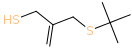

Group additivity:
	gauche
		Cs(CsRRR) = 3
		Ss(CsH) = 1
		Cs(RRRR) = 3
		CsOsCdSs = 1
		Ss(CsCs) = 1
		Cd(CsCs) = 1
	group
		Cs-CdsSsHH = 1
		Cs-CsCsCsSs = 1
		Cds-CdsHH = 1
		Ss-CsH = 1
		Cds-CdsCsCs = 1
		Cs-CsHHH = 2
	other
		R = 10

Uncertainty dG =  3.23071199583  kcal/mol
CC(C)(C)SS(52)


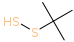

Thermo Library:  28

Uncertainty dG =  2.0  kcal/mol
[CH2]C1C=C(CC)SC=1S(4755)


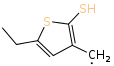

Group additivity:
	radical
		Allyl_P = 1
	ring
		thiophene = 1
	other
		R = 9
	group
		Ss-CdCd = 1
		Cds-Cds(Cds-Cds)H = 1
		Cds-CdsCsSs = 1
		Cs-(Cds-Cds)CsHH = 1
		Cds-CdsCsCs = 1
		Cs-(Cds-Cds)HHH = 1
		Cs-CsHHH = 1
		Ss-CdH = 1

Uncertainty dG =  2.8173569174  kcal/mol
C=C=C(93)


Group additivity:
	gauche
		CsOsCdSs = 2
	group
		Cds-CdsHH = 2
	other
		R = 3

Uncertainty dG =  1.82002747232  kcal/mol
S=C1SC2=CCCC1=C2(5826)


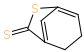

Group additivity:
	other
		R = 9
	group
		Sd-Cd = 1
		C=S-CsSs = 1
		Cds-Cds(Cds-Cds)H = 1
		Ss-C=SCd = 1
		Cs-(Cds-Cds)CsHH = 2
		Cds-CdsCsH = 1
		Cds-CdsC=SCs = 1
	polycyclic
		PolycyclicRing = 1

Uncertainty dG =  2.82842712475  kcal/mol
[CH2]C(=C)C(=S)S(968)


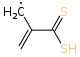

Group additivity:
	radical
		Allyl_P = 1
	gauche
		Cs(RRRR) = 1
		CsOsCdSs = 2
		Ss(RR) = 1
	group
		Sd-Cd = 1
		C=S-CsSs = 1
		Cs-(Cds-Cds)HHH = 1
		Cds-CdsHH = 1
		Cds-CdsC=SCs = 1
		Ss-C=SH = 1
	other
		R = 6

Uncertainty dG =  2.30488611432  kcal/mol
[CH2]C(=C)C[C]1CCC1=C(2018)


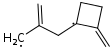

Group additivity:
	radical
		Allyl_T = 1
		Allyl_P = 1
	ring
		methylenecyclobutane = 1
	other
		R = 9
	group
		Cs-(Cds-Cds)CsCsH = 1
		Cs-(Cds-Cds)HHH = 1
		Cds-CdsHH = 2
		Cs-(Cds-Cds)CsHH = 1
		Cds-CdsCsCs = 2
		Cs-CsCsHH = 1

Uncertainty dG =  2.87228132327  kcal/mol
C=C1C(=S)SC2=CCC12(5526)


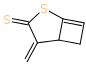

Group additivity:
	other
		R = 9
	group
		Sd-Cd = 1
		C=S-CsSs = 1
		Cs-(Cds-Cds)CsHH = 1
		Cs-(Cds-Cds)(Cds-Cds)CsH = 1
		Cds-CdsHH = 1
		Cds-CdsCsSs = 1
		Ss-C=SCd = 1
		Cds-CdsCsH = 1
		Cds-CdsC=SCs = 1
	polycyclic
		PolycyclicRing = 1

Uncertainty dG =  2.8173569174  kcal/mol
[CH2]C(=C)C[C](C)C(=S)S(1728)


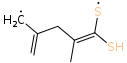

Group additivity:
	radical
		SJ-Cd = 1
		Allyl_P = 1
	gauche
		Ss(RR) = 2
		Cs(RRRR) = 3
		CsOsCdSs = 2
		Cd(CsCs) = 2
	group
		Cs-(Cds-Cds)(Cds-Cds)HH = 1
		Cds-CdsCsCs = 3
		Ss-CdH = 2
		Cds-CdsHH = 1
		Cs-(Cds-Cds)HHH = 2
	other
		R = 9

Uncertainty dG =  3.15238005323  kcal/mol
C=CC1=CC(=C)C(=S)S1(5335)


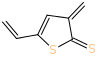

Group additivity:
	ring
		2,3-dihydrothiophene = 1
	other
		R = 9
	group
		Sd-Cd = 1
		C=S-CsSs = 1
		Cds-Cds(Cds-Cds)H = 1
		Cds-CdsHH = 2
		Ss-C=SCd = 1
		Cds-CdsCsCs = 2

Uncertainty dG =  2.85043856275  kcal/mol
[CH2]C(=C)C([CH2])=C(1761)


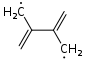

Group additivity:
	radical
		Allyl_P = 2
	gauche
		Cs(RRRR) = 2
		CsOsCdSs = 4
	group
		Cs-(Cds-Cds)HHH = 2
		Cds-CdsHH = 2
		Cds-Cds(Cds-Cds)Cs = 2
	other
		R = 6

Uncertainty dG =  2.59807621135  kcal/mol
C=C(C)SSC[C]1CCC1=C(1997)


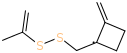

Group additivity:
	radical
		Allyl_T = 1
	ring
		methylenecyclobutane = 1
	other
		R = 11
	group
		Cs-(Cds-Cds)CsCsH = 1
		Cs-(Cds-Cds)HHH = 1
		Cds-CdsHH = 2
		Ss-SsCd = 1
		Cs-(Cds-Cds)CsHH = 1
		Cds-CdsCsCs = 1
		Cds-CdsCsSs = 1
		Cs-CsCsHH = 1
		Ss-SsCs = 1

Uncertainty dG =  3.26917420766  kcal/mol
C=C1C2=CC1(C)[C](S)S2(5539)


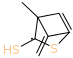

Group additivity:
	radical
		CsJ-CsSsSs = 1
	other
		R = 9
	group
		Ss-CsH = 1
		Cds-CdsHH = 1
		Cs-CsSsSsH = 1
		Cs-(Cds-Cds)(Cds-Cds)CsCs = 1
		Cds-CdsCsH = 1
		Cds-CdsCsCs = 1
		Cs-CsHHH = 1
		Ss-CsCd = 1
	polycyclic
		PolycyclicRing = 1

Uncertainty dG =  2.8173569174  kcal/mol
C=C(C)C([S])=S(462)


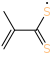

Group additivity:
	radical
		SJ-C=S = 1
	gauche
		Cs(RRRR) = 1
		CsOsCdSs = 2
		Ss(RR) = 1
	group
		Sd-Cd = 1
		C=S-CsSs = 1
		Cs-(Cds-Cds)HHH = 1
		Cds-CdsHH = 1
		Cds-CdsC=SCs = 1
		Ss-C=SH = 1
	other
		R = 6

Uncertainty dG =  2.30488611432  kcal/mol
C=C(C)[C](S)C(C)(C)C(1427)


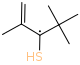

Group additivity:
	radical
		CsJ-CsCdSs = 1
	gauche
		Ss(CsH) = 1
		Cs(Cs(CsCsCs)RRR) = 3
		CsOsCdSs = 1
		Cs(CsCsCsCs) = 1
		Cs(RRRR) = 2
		Cd(CsCs) = 1
	group
		Cs-(Cds-Cds)HHH = 1
		Cs-CsHHH = 2
		Cs-CdsCsSsH = 1
		Ss-CsH = 1
		Cds-CdsCsCs = 1
		Cs-CsCsCsCs = 1
	other
		R = 9

Uncertainty dG =  3.0  kcal/mol
[CH2]C(C)=C1CC=C(S)S1(4135)


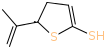

Group additivity:
	radical
		CsJ-CsCdSs = 1
	ring
		2,3-dihydrothiophene = 1
	other
		R = 9
	group
		Cs-(Cds-Cds)HHH = 1
		Cds-CdsHH = 1
		Cs-CdsCsSsH = 1
		Cs-(Cds-Cds)CsHH = 1
		Cds-CdsCsCs = 1
		Cds-CdsCsH = 1
		Ss-CdH = 1
		Ss-CsCd = 1

Uncertainty dG =  2.8173569174  kcal/mol
CCC1=CC(C)=C(S)S1(4768)


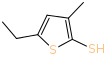

Group additivity:
	ring
		thiophene = 1
	other
		R = 9
	group
		Ss-CdCd = 1
		Cds-Cds(Cds-Cds)H = 1
		Cds-CdsCsSs = 1
		Cs-(Cds-Cds)CsHH = 1
		Cds-CdsCsCs = 1
		Cs-(Cds-Cds)HHH = 1
		Cs-CsHHH = 1
		Ss-CdH = 1

Uncertainty dG =  2.80624304008  kcal/mol
CC1C2=CC1(C)[C](S)S2(4982)


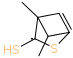

Group additivity:
	radical
		CsJ-CsSsSs = 1
	other
		R = 9
	group
		Cs-(Cds-Cds)CsCsH = 1
		Cs-(Cds-Cds)CsCsCs = 1
		Cs-CsSsSsH = 1
		Ss-CsCd = 1
		Cds-CdsCsSs = 1
		Cds-CdsCsH = 1
		Cs-CsHHH = 1
	polycyclic
		PolycyclicRing = 1

Uncertainty dG =  2.80624304008  kcal/mol
[CH2]C1(C)SC1=S(1049)


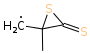

Group additivity:
	radical
		Cs_P = 1
	ring
		thiirane = 1
	other
		R = 6
	group
		Ss-C=SCs = 1
		Sd-Cd = 1
		Cs-CsCsCsCs = 1
		C=S-CsSs = 1
		Cs-CsHHH = 2

Uncertainty dG =  2.26384628453  kcal/mol
[CH2]C12CSC(S1)=C(C)C2(2759)


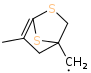

Group additivity:
	radical
		Cs_P = 1
	other
		R = 9
	group
		Cs-CsCsCsSs = 1
		Cs-CsSsHH = 1
		Cs-(Cds-Cds)CsHH = 1
		Cs-(Cds-Cds)HHH = 1
		Cds-CdsCsCs = 2
		Cs-CsHHH = 1
		Ss-CsCd = 1
	polycyclic
		PolycyclicRing = 1

Uncertainty dG =  2.8394541729  kcal/mol
C=C(CS)C(=S)C[C](C)C(985)


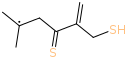

Group additivity:
	radical
		Tertalkyl = 1
	gauche
		Ss(CsH) = 1
		Cs(CsCsCsR) = 1
		CsOsCdSs = 2
		Cs(Cs(CsCsR)RRR) = 2
		Cs(RRRR) = 2
	group
		Cs-CdsSsHH = 1
		Cs-C=SCsHH = 1
		Sd-Cd = 1
		C=S-CdsCs = 1
		Cds-CdsC=SCs = 1
		Cs-CsCsCsH = 1
		Cds-CdsHH = 1
		Cs-CsHHH = 1
		Ss-CsH = 1
	other
		R = 10

Uncertainty dG =  3.16227766017  kcal/mol
C=C1CCC1=C(1796)


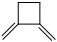

Group additivity:
	ring
		12methylenecyclobutane = 1
	other
		R = 6
	group
		Cs-(Cds-Cds)CsHH = 2
		Cds-CdsHH = 2
		Cds-Cds(Cds-Cds)Cs = 2

Uncertainty dG =  2.30488611432  kcal/mol
[CH2]C(C)(C)SC(=S)C(=C)C(463)


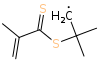

Group additivity:
	radical
		Cs_P = 1
	gauche
		Ss(RR) = 1
		Cs(RRRR) = 2
		CsOsCdSs = 2
		Cs(CsRRR) = 3
	group
		Sd-Cd = 1
		C=S-CsSs = 1
		Cs-CsCsCsSs = 1
		Cds-CdsHH = 1
		Cs-(Cds-Cds)HHH = 1
		Ss-C=SCs = 1
		Cs-CsHHH = 2
	other
		R = 10

Uncertainty dG =  3.21130814467  kcal/mol
CCC12[CH]C(C)=C(S1)S2(4833)


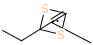

Group additivity:
	radical
		Allyl_S = 1
	other
		R = 9
	group
		Cs-(Cds-Cds)CsHH = 1
		Cs-CsCsHH = 1
		Cs-CsCsSsSs = 1
		Ss-CsCd = 1
		Cs-(Cds-Cds)HHH = 1
		Cds-CdsCsCs = 2
		Cs-CsHHH = 1
	polycyclic
		PolycyclicRing = 1

Uncertainty dG =  2.8394541729  kcal/mol
C=C(C)[C]1SCC2(CCC2=C)S1(2153)


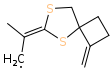

Group additivity:
	radical
		Allyl_P = 1
	other
		R = 12
	group
		Cs-(Cds-Cds)CsHH = 1
		Cds-CdsHH = 1
		Cs-CsCsHH = 1
		Ss-CsCd = 2
		Cs-(Cds-Cds)HHH = 2
		Cds-CdsCsCs = 3
		Cs-CsCsCsCs = 1
	polycyclic
		PolycyclicRing = 1

Uncertainty dG =  3.56195171219  kcal/mol
[CH2]C(=C)C[C](C)C(=S)SC(C)(C)C(1682)


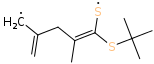

Group additivity:
	radical
		SJ-Cd = 1
		Allyl_P = 1
	gauche
		Ss(RR) = 1
		Cs(CsRRR) = 3
		Ss(CsR) = 1
		CsOsCdSs = 2
		Cs(RRRR) = 4
		Cd(CsCs) = 2
	group
		Cs-CsCsCsSs = 1
		Cds-CdsHH = 1
		Cs-(Cds-Cds)(Cds-Cds)HH = 1
		Ss-CsCd = 1
		Cs-(Cds-Cds)HHH = 2
		Cds-CdsCsCs = 3
		Cs-CsHHH = 3
		Ss-CdH = 1
	other
		R = 13

Uncertainty dG =  4.10030486671  kcal/mol
C=C(C)C(=S)SC[C](C)C(1063)


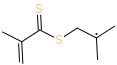

Group additivity:
	radical
		Tertalkyl = 1
	gauche
		Ss(RR) = 1
		Cs(CsCsCsR) = 1
		CsOsCdSs = 2
		Cs(Cs(CsCsR)RRR) = 2
		Cs(RRRR) = 2
	group
		Sd-Cd = 1
		C=S-CsSs = 1
		Cs-(Cds-Cds)HHH = 1
		Cds-CdsHH = 1
		Cds-CdsC=SCs = 1
		Cs-CsCsCsH = 1
		Ss-C=SCs = 1
		Cs-CsSsHH = 1
		Cs-CsHHH = 1
	other
		R = 10

Uncertainty dG =  3.16227766017  kcal/mol
C=C1CSC(=C(C)C1)C(C)(C)C(1821)


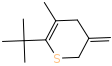

Group additivity:
	ring
		Cyclohexane = 1
	other
		R = 12
	group
		Cs-CdsSsHH = 1
		Cs-(Cds-Cds)CsCsCs = 1
		Cds-CdsHH = 1
		Cds-CdsCsSs = 1
		Cs-(Cds-Cds)(Cds-Cds)HH = 1
		Ss-CsCd = 1
		Cs-(Cds-Cds)HHH = 1
		Cds-CdsCsCs = 2
		Cs-CsHHH = 3

Uncertainty dG =  3.54436171969  kcal/mol
C=[C]C(38)


Group additivity:
	radical
		Cds_S = 1
	gauche
		Cs(RRRR) = 1
		CsOsCdSs = 2
	group
		Cs-(Cds-Cds)HHH = 1
		Cds-CdsCsH = 1
	other
		R = 3

Uncertainty dG =  1.82002747232  kcal/mol
CC1C=C2[CH]CSC=1S2(5303)


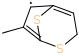

Group additivity:
	radical
		C=CCJC=C = 1
	other
		R = 9
	group
		Ss-CdCd = 1
		Cs-CdsSsHH = 1
		Cs-(Cds-Cds)(Cds-Cds)HH = 1
		Cds-CdsCsCs = 2
		Cds-CdsCsH = 1
		Ss-CsCd = 1
		Cs-(Cds-Cds)HHH = 1
		Cds-CdsCsSs = 1
	polycyclic
		PolycyclicRing = 1

Uncertainty dG =  2.85043856275  kcal/mol
C=C1[CH]CC(C)=C(S)S1(2849)


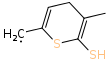

Group additivity:
	radical
		Allyl_P = 1
	ring
		Cyclohexane = 1
	other
		R = 9
	group
		Ss-CdCd = 1
		Cds-CdsCsSs = 1
		Cds-CdsCsH = 1
		Cs-(Cds-Cds)(Cds-Cds)HH = 1
		Cds-CdsCsCs = 2
		Cs-(Cds-Cds)HHH = 2
		Ss-CdH = 1

Uncertainty dG =  2.87228132327  kcal/mol
[CH2]C(=C)S[S](1413)


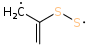

Group additivity:
	radical
		Allyl_P = 1
		SJ-Ss-Cs = 1
	gauche
		Cs(RRRR) = 1
		CsOsCdSs = 2
		Ss(RR) = 2
	group
		Cs-(Cds-Cds)HHH = 1
		Ss-SsCd = 1
		Ss-SsH = 1
		Cds-CdsCsSs = 1
	other
		R = 5

Uncertainty dG =  2.17944947177  kcal/mol
C=C(C)C(=S)S(394)


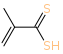

Group additivity:
	gauche
		Cs(RRRR) = 1
		CsOsCdSs = 2
		Ss(RR) = 1
	group
		Sd-Cd = 1
		C=S-CsSs = 1
		Cs-(Cds-Cds)HHH = 1
		Cds-CdsHH = 1
		Cds-CdsC=SCs = 1
		Ss-C=SH = 1
	other
		R = 6

Uncertainty dG =  2.29128784748  kcal/mol
[CH2]C(=C)SC1SC(C=C)=CC=1C(5407)


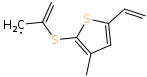

Group additivity:
	radical
		Allyl_P = 1
	ring
		thiophene = 1
	other
		R = 12
	group
		Ss-CdCd = 2
		Cs-(Cds-Cds)HHH = 2
		Cds-CdsHH = 2
		Cds-CdsCsSs = 1
		Cds-Cds(Cds-Cds)Cs = 1
		Cds-Cds(Cds-Cds)H = 1
		Cds-CdsCsCs = 2

Uncertainty dG =  3.54436171969  kcal/mol
[CH2]C1C=C(S)CCC=1S(4522)


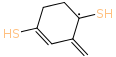

Group additivity:
	radical
		CsJ-CsCdSs = 1
	ring
		Cyclohexane = 1
	other
		R = 9
	group
		Cds-Cds(Cds-Cds)H = 1
		Cds-CdsHH = 1
		Cs-CdsCsSsH = 1
		Ss-CsH = 1
		Cs-(Cds-Cds)CsHH = 1
		Cds-CdsCsSs = 1
		Cs-CsCsHH = 1
		Ss-CdH = 1

Uncertainty dG =  2.8173569174  kcal/mol
[CH2]C(C)(C)S[S](103)


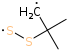

Thermo Library:  28
Group additivity:
	radical
		Cs_P = 1
		SJ-Ss-Cs = 1

Uncertainty dG =  2.52487623459  kcal/mol
C[C]1C(=S)SC2=CCC12(5320)


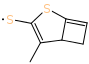

Group additivity:
	radical
		SJ-Cd = 1
	other
		R = 9
	group
		Cs-(Cds-Cds)CsHH = 1
		Cs-(Cds-Cds)(Cds-Cds)CsH = 1
		Cds-CdsCsSs = 1
		Cds-CdsCsH = 1
		Cds-CdsCsCs = 2
		Cs-(Cds-Cds)HHH = 1
		Ss-CdH = 1
	polycyclic
		PolycyclicRing = 1

Uncertainty dG =  2.8394541729  kcal/mol
[CH2]C=C1CC(C)=C(S)S1(3539)


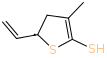

Group additivity:
	radical
		CsJ-CsCdSs = 1
	ring
		2,3-dihydrothiophene = 1
	other
		R = 9
	group
		Cs-(Cds-Cds)HHH = 1
		Cds-CdsHH = 1
		Cs-CdsCsSsH = 1
		Cs-(Cds-Cds)CsHH = 1
		Cds-CdsCsCs = 1
		Cds-CdsCsH = 1
		Ss-CdH = 1
		Ss-CsCd = 1

Uncertainty dG =  2.8173569174  kcal/mol
[CH2]C1(CSC(C)(C)C)CS1(785)


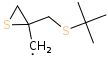

Group additivity:
	radical
		Cs_P = 1
	ring
		thiirane = 1
	other
		R = 10
	group
		Cs-CsCsCsSs = 2
		Ss-CsCs = 2
		Cs-CsSsHH = 2
		Cs-CsHHH = 4

Uncertainty dG =  3.22102468168  kcal/mol
C=C1CCC(C)=C(SC[C](C)C)S1(2893)


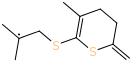

Group additivity:
	radical
		Tertalkyl = 1
	ring
		Cyclohexane = 1
	other
		R = 13
	group
		Ss-CdCd = 1
		Cs-(Cds-Cds)CsHH = 2
		Cds-CdsHH = 1
		Cds-CdsCsCs = 2
		Cs-CsCsCsH = 1
		Cs-(Cds-Cds)HHH = 1
		Cds-CdsCsSs = 1
		Cs-CsHHH = 2
		Ss-CsCd = 1

Uncertainty dG =  3.75  kcal/mol
C=C(C)C([S])(SC(C)(C)C)C(C)(C)C(482)


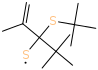

Group additivity:
	radical
		SJ-Cs = 1
	gauche
		Cs(CsRRR) = 3
		Ss(CsH) = 1
		Ss(CsCs) = 1
		Cs(Cs(CsCsCs)RRR) = 3
		CsOsCdSs = 1
		Cs(CsCsCsCs) = 1
		Cs(RRRR) = 3
		Cd(CsCs) = 1
	group
		Cs-CsCsCsSs = 1
		Cds-CdsHH = 1
		Cs-CsHHH = 6
		Ss-CsCs = 1
		Ss-CsH = 1
		Cs-(Cds-Cds)HHH = 1
		Cs-CsCsCsCs = 1
	other
		R = 14

Uncertainty dG =  4.38035386698  kcal/mol
C=CC12C=C(C1)C(=S)S2(5862)


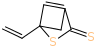

Group additivity:
	other
		R = 9
	group
		C=S-CsSs = 1
		Cs-(Cds-Cds)CsHH = 1
		Cds-CdsHH = 1
		Cds-CdsC=SCs = 1
		Ss-C=SCs = 1
		Cds-CdsCsH = 1
		Cs-CsCsCsCs = 1
	polycyclic
		PolycyclicRing = 1

Uncertainty dG =  2.79508497187  kcal/mol
C=C1CC[CH]C2=CC(C)=C(S1)S2(6308)


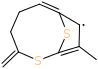

Group additivity:
	radical
		C=CCJC=C = 1
	other
		R = 12
	group
		Ss-CdCd = 2
		Cs-(Cds-Cds)CsHH = 2
		Cds-CdsHH = 1
		Cs-(Cds-Cds)(Cds-Cds)HH = 1
		Cds-CdsCsCs = 2
		Cs-(Cds-Cds)HHH = 1
		Cds-CdsCsSs = 2
	polycyclic
		PolycyclicRing = 1

Uncertainty dG =  3.54436171969  kcal/mol
CCC12[CH]C(C1)=C(S)S2(5081)


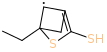

Group additivity:
	radical
		Allyl_S = 1
	other
		R = 9
	group
		Cs-CsCsCsSs = 1
		Cs-CsCsHH = 1
		Ss-CsCd = 1
		Cs-(Cds-Cds)CsHH = 1
		Cds-CdsCsCs = 2
		Cs-CsHHH = 1
	polycyclic
		PolycyclicRing = 1

Uncertainty dG =  2.82842712475  kcal/mol
CC(C)(C)SSC(C)(C)C(50)


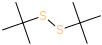

Group additivity:
	gauche
		Ss(RR) = 2
		Cs(RRRR) = 2
		Cs(CsRRR) = 6
	group
		Cs-CsCsCsSs = 2
		Cs-CsHHH = 4
		Ss-SsCs = 1
	other
		R = 10

Uncertainty dG =  3.54436171969  kcal/mol
S2(12)


Thermo Library:  15

Uncertainty dG =  2.0  kcal/mol


In [12]:
for species, source in uncertainty.speciesSourcesDict.iteritems():
    print '=========='
    print species
    display(species)
    if 'Library' in source:
        print 'Thermo Library: ', source['Library']
    if 'QM' in source:
        print 'QM: ', source['QM']
    if 'GAV' in source:
        print 'Group additivity:'
        for groupType, groupList in source['GAV'].iteritems():
            print '\t', groupType
            for group, weight in groupList:
                print '\t\t', group, '=', weight
                
    spcIndex = uncertainty.speciesList.index(species)    
    print ''
    print 'Uncertainty dG = ', uncertainty.thermoInputUncertainties[spcIndex], ' kcal/mol'